# Utilities

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
from jupyterthemes import jtplot
import matplotlib as mpl
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import cartopy
import xarray as xr
from shapely.geometry.polygon import LinearRing
from matplotlib import colors
import pickle
jtplot.style(context='paper', fscale=1.4, spines=True, grid=False, ticks=True,gridlines='--')

fontsize=16
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['axes.labelsize']= 'x-large'
mpl.rcParams['figure.facecolor']='white'

mpl.rcParams['text.latex.preamble']= r'\usepackage{amsmath}'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']) 

In [73]:
def box_plot5(latlon,col='#6a3d9a',lw=3,has=None):
    min_lon = latlon[0]
    max_lon = latlon[1]
    min_lat = latlon[2]
    max_lat = latlon[3]
    if min_lon>180:
        min_lon=min_lon-360
    if max_lon>180:
        max_lon=max_lon-360
    latsq = [min_lat, max_lat, max_lat, min_lat]
    lonsq = [min_lon, min_lon, max_lon, max_lon]
    ring = LinearRing(list(zip(lonsq, latsq)))
    ax.coastlines(linewidth=1)
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',color='k')
    ax.add_geometries([ring], ccrs.PlateCarree(), facecolor='None', edgecolor=col,linewidth=lw,hatch=has)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axis('off')

In [2]:
extent_latlon = {'am': [-20, -90, -30, 16],
 'wam': [40, -25, -15, 30],
 'ism': [65, 90, 0, 30],
 'easm': [105, 145, 5, 45]}
extent_boxes2 = {'am1': [360-90,360-20, -30, 16],
                'am3': [360-90,360-20, -30, 16],
 'wam4': [360-25, 40, -15, 30],
 'ism1': [65, 90, 0, 30],
 'easm2': [105, 145, 5, 45]}

In [3]:
model_names = ['HadGEM3-GC3-1MM','CanESM5','CESM2','IPSL-CM6A-LR']
lat_keys = [False,True,True,True]

In [4]:
model_names_ttls = ['HadGEM3-GC31-MM','CanESM5','CESM2','IPSL-CM6A-LR']
model_names_ttls2 = ['HadGEM3-GC31-MM', 'CESM2','CanESM5', 'IPSL-CM6A-LR']


In [5]:
jasmin_path = '/p/tmp/mayayami/JASMIN/'

In [6]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [7]:
idc = [[60,140],[60,140],[60,140],[60,140]]
co2_slicesy = dict(zip(model_names,idc))

In [8]:
idc = [[60*12,140*12],[60*12,140*12],[60*12,140*12],[60*12,140*12]]
co2_slicesm = dict(zip(model_names,idc))

In [9]:
model_names = ['HadGEM3-GC3-1MM','CanESM5','CESM2','IPSL-CM6A-LR']
lat_keys = [False,True,True,True]

In [10]:
tos_keys = dict(zip(model_names,['tos','tos','TS','tos']))
prcp_keys = dict(zip(model_names,['precipitation_flux','pr','PRECC','pr']))

In [11]:
aidcs = [[0,80*12],[0,80*12],[0+11,80*12+11],[0,80*12]]
cidcs = [[20*12,100*12],[20*12,100*12],[100*12+11,180*12+11],[60*12,140*12]]
aslices1 = dict(zip(model_names,aidcs))
cslices1 = dict(zip(model_names,cidcs))
aslices = aslices1
cslices = cslices1
aslicesm = aslices1
cslicesm = cslices1

In [12]:
aidcs = [[0,80],[0,80],[1,81],[0,80]]
cidcs = [[20,100],[20,100],[101,181],[60,140]]
aslicesy = dict(zip(model_names,aidcs))
cslicesy = dict(zip(model_names,cidcs))

In [13]:
aidcs = [[0,-1],[0,-1],[0,-1],[0,-1]]
cidcs = [[0,-1],[0,-1],[0,-1],[0,-1]]
aslices_full = dict(zip(model_names,aidcs))
cslices_full = dict(zip(model_names,cidcs))

In [14]:
extent_boxes = {'am1': [-20, -90, -30, 16],
                'am3': [-20, -90, -30, 16],
 'wam4': [40, -25, -15, 30],
 'ism1': [65, 90, 0, 30],
 'easm2': [105, 145, 5, 45]}

In [20]:
## the final boxes used in the manuscript were am1, am3, wam4, ism1 and easm2
## but I kept the whole list here to keep the indexing consistent in the file
boxes_latlon = [[285-360,317.5-360,-15,-5,],
    [295-360,315-360,-15,-5],
    [-75,-60,0,10],
    [-75,-50,-10,0],
    [-50,-40,-15,-5],
    [-20,20,9,20],
    [-20,20,0,10],
    [-20,20,5,15],
   [-75,-55,-5,5],
   [-20,25,5,20],
   [70,85,5,25],
    [110,140,10,40]]
boxes_dict = {
    'am1': [285,317.5,-15,-5],
    'am2' :[295,315,-15,-5],
     'pam1':   [360-75,360-60,0,10],
    'pam2': [360-75,360-50,-10,0],
    'pam3': [360-50,360-40,-15,-5],
    'wam1': [360-20,360+20,9,20],
    'wam2': [360-20,360+20,0,10],
    'wam3': [360-20,360+20,5,15],
    'am3':[360-75,360-55,-5,5],
    'wam4':[360-20,25,5,20],
    'ism1':[70,85,5,25],
    'easm2':[110,140,10,40]
}

In [17]:
labels = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)','(m)','(n)','(o)','(p)']

# ITCZ

In [65]:
obs_itcz = xr.open_dataset('../obs_itcz.nc').itcz
aitcz = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/itcz.nc').aitcz
citcz = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/itcz.nc').citcz

In [66]:
hist_itcz = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/hist_itcz.nc').hist_itcz

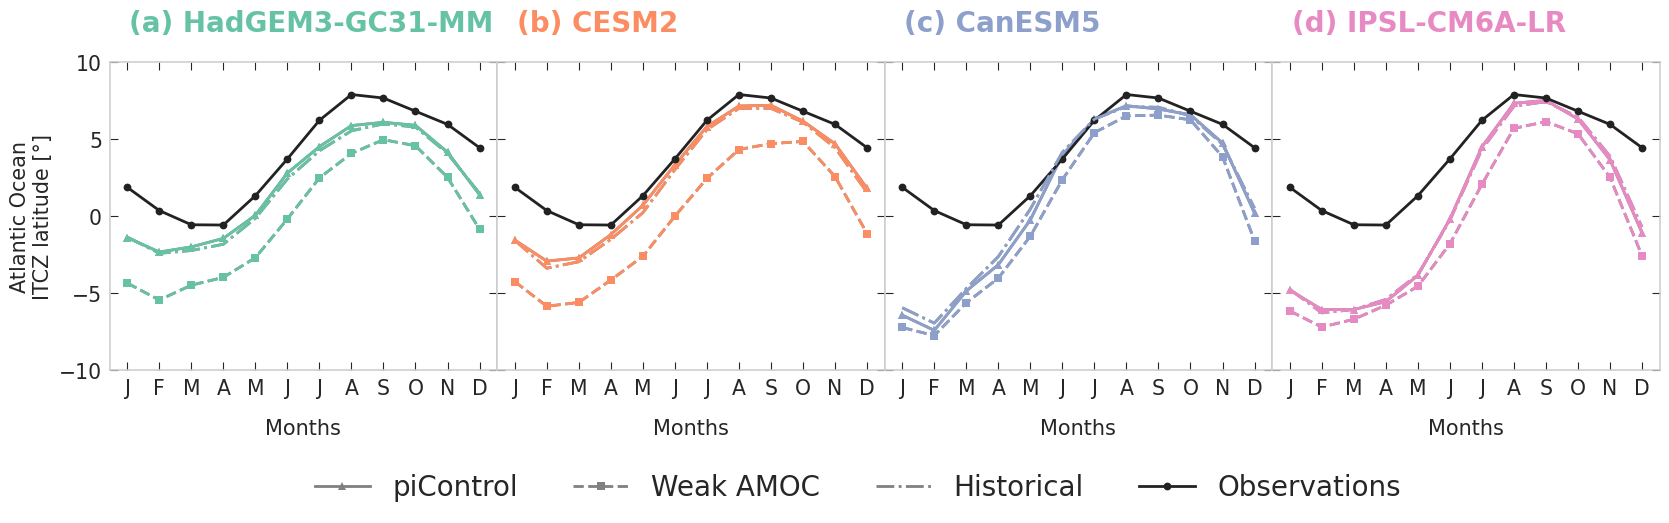

In [67]:
fig = plt.figure(figsize = (20,4))
gs = fig.add_gridspec(1, 4)
model_names2 = ['HadGEM3-GC3-1MM', 'CESM2','CanESM5', 'IPSL-CM6A-LR']
model_names_ttls2 = ['HadGEM3-GC31-MM', 'CESM2','CanESM5', 'IPSL-CM6A-LR']
model_indices2  = [0,2,1,3]

aitcz1 = aitcz
citcz1 = citcz
obs_itcz1 = obs_itcz
oceans = ['Atlantic','Indian','Pacific']
model_colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
cslices = cslices1
aslices = aslices1

for i, model in enumerate(model_names2):        
    ax = fig.add_subplot(gs[0,i])
    linea = avg(aitcz1.sel(models=model)[aslices[model][0]:aslices[model][1]]).plot(color='grey',lw=2,label='piControl',marker='^')
    linec = avg(citcz1.sel(models=model)[cslices[model][0]:cslices[model][1]]).plot(color='grey',lw=2,linestyle='--',label='Weak AMOC',marker='s')
    lineh =     avg(hist_itcz.sel(models=model)).plot(color='grey',linestyle='-.',lw=2,label='Historical')

    avg(aitcz1.sel(models=model)[aslices[model][0]:aslices[model][1]]).plot(color=model_colors[i],lw=2,marker='^')
    avg(citcz1.sel(models=model)[cslices[model][0]:cslices[model][1]]).plot(color=model_colors[i],lw=2,linestyle='--',marker='s')
    avg(obs_itcz1).plot(color='k',lw=2,label='Observations',marker='o')
    avg(hist_itcz.sel(models=model)).plot(color=model_colors[i],linestyle='-.',lw=2)

    ax.set_xticks(range(1,13))
    ax.set_xticklabels([m[0] for m in months])
    ax.tick_params(axis='y', which='both',labelleft=False)
    if i==0:
        ax.tick_params(axis='y', which='both',labelleft=True)
        ax.set_ylabel('Atlantic Ocean\nITCZ latitude [°]',fontsize=15)
    else:
        ax.set_ylabel('')

    ax.set_ylim(-10,10)
    ax.text(0.05,1.1,labels[i]+' '+model_names_ttls2[i],transform=ax.transAxes,color=model_colors[i],fontweight='bold',fontsize=20)
    ax.set_title('')
    ax.set_xlabel('Months',fontsize=15,labelpad=15)
plt.legend(bbox_to_anchor=(-2.5, -0.3), loc='upper left', borderaxespad=0., fontsize=20,fancybox=False,frameon=False,ncol=4)

fig.subplots_adjust(wspace=0,hspace=0)
fig.savefig('../reps/AMOC_hosing_precip/plots/itcz.pdf',bbox_inches='tight')
fig.savefig('../reps/AMOC_hosing_precip/plots/itcz.png',bbox_inches='tight')
plt.show()


# AMOC2

In [68]:
obs_AMOC = xr.open_dataset('../AR6/rapid_moc_transports.nc').moc_mar_hc10
obs_AMOCy = obs_AMOC.groupby('time.year').mean('time')
obs_AMOC_unc = 0.9

In [69]:
with open('/p/tmp/mayayami/amoc26N.pkl', 'rb') as f:
    amoc = pickle.load(f)

In [70]:
Camoc = {}
for model in model_names:
    with open('/p/tmp/mayayami/NAHosMIP/abrubt4xco2_amoc/mts_{}_4XCO2.pkl'.format(model), 'rb') as f:
        x = pickle.load(f)['26']
        Camoc[model]=x

In [72]:
Hamoc = xr.open_dataset('../AR6/CMIP6_amoc2.nc').amoc.sel(indices='strn26').mean(dim='ensemble_members')

In [73]:
model_namesH = ['HadGEM3-GC31-MM', 'CanESM5', 'CESM2','IPSL-CM6A-LR']

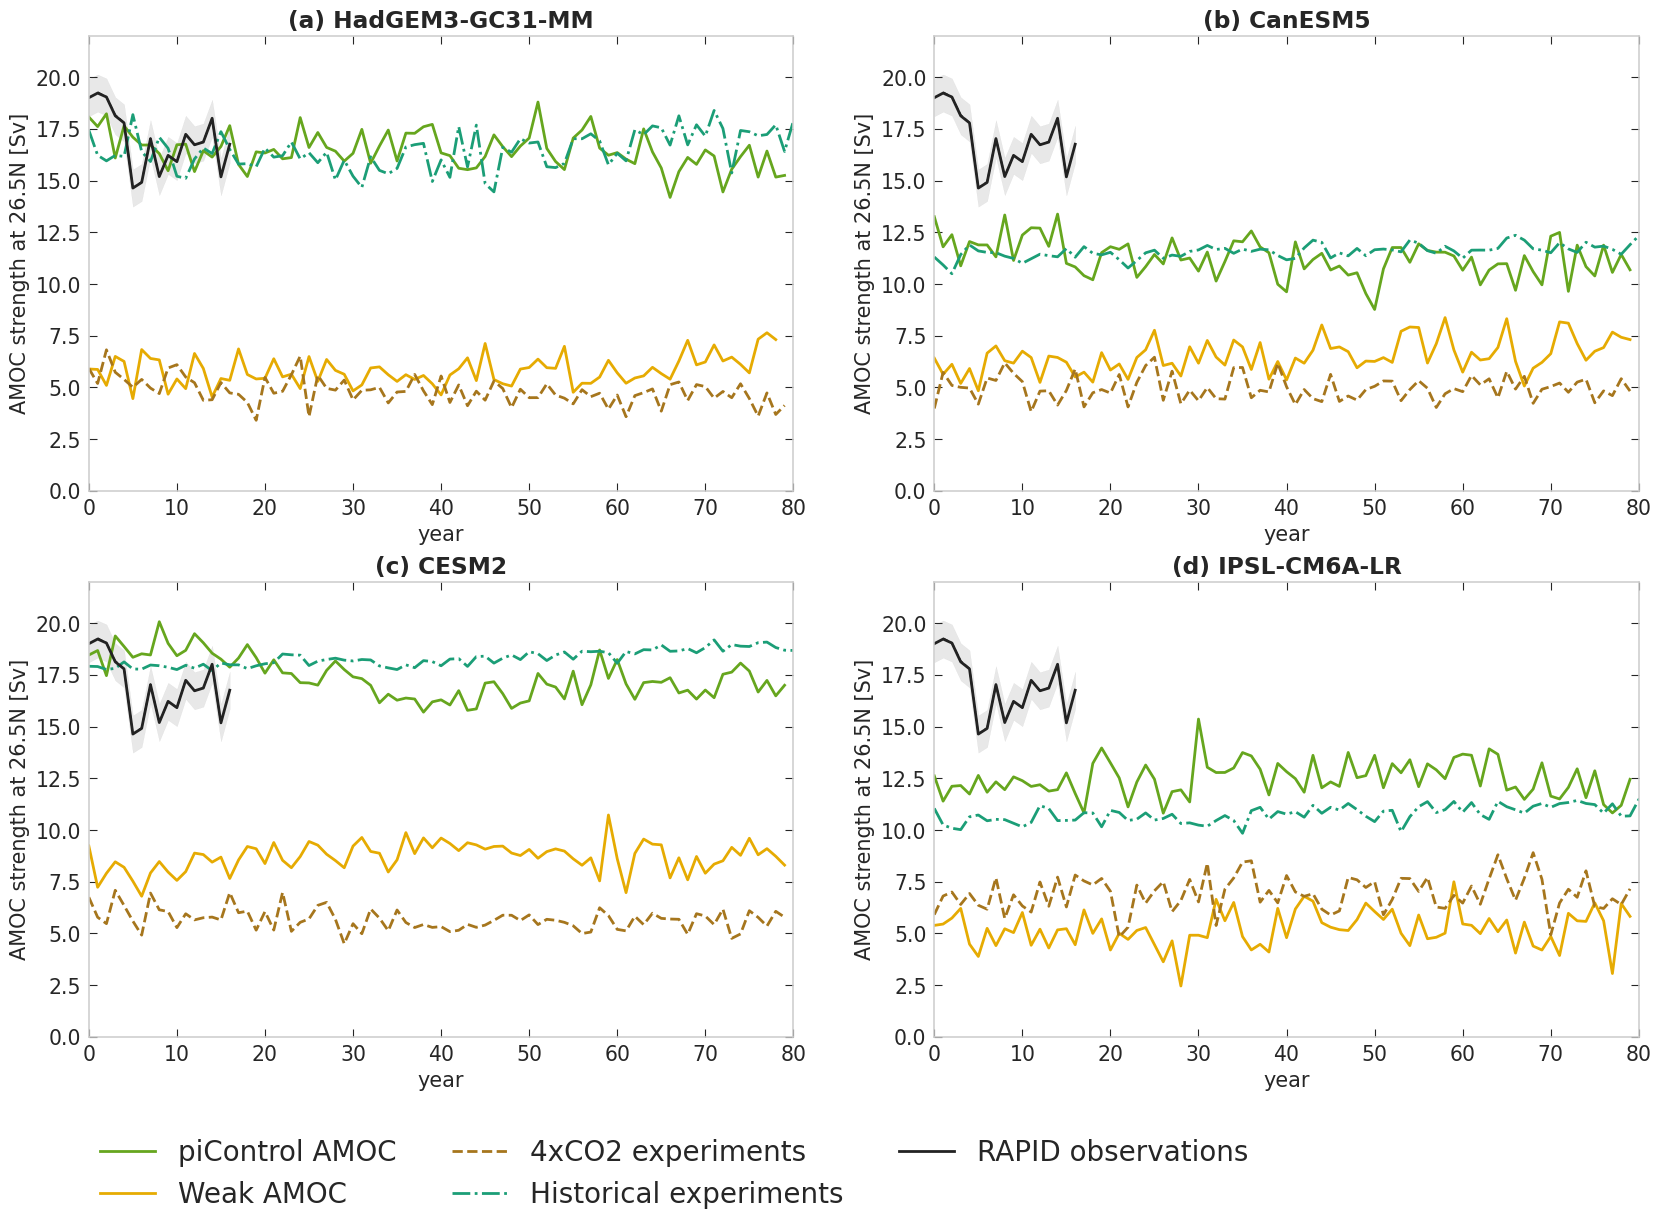

In [78]:

m = 'CESM2'
cslices=cslices1
model_colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
model_colors2 = ['#a6d854','#ffd92f','#b3b3b3','#e5c494']
fig, axs = plt.subplots(2,2,figsize = (20,13))
for i, ax in enumerate(axs.flatten()):
    m = model_names[i]
    model=m
#     print(m)
    ax.plot(np.arange(len(amoc[m]['con'][aslicesy[model][0]:aslicesy[model][1]])),amoc[m]['con'][aslicesy[model][0]:aslicesy[model][1]],'C4',lw=2,label='piControl AMOC')
#     print(np.average(amoc[m]['con'][aslicesy[model][0]:aslicesy[model][1]]))
    if m=='IPSL-CM6A-LR':
#         ax.plot(np.arange(len(amoc[m]['r100'])),amoc[m]['r100'],'C1',lw=2,alpha=0.4)
        ax.plot(np.arange(len(amoc[m]['r100'][cslicesy[model][0]:cslicesy[model][1]])),amoc[m]['r100'][cslicesy[model][0]:cslicesy[model][1]],'C5',lw=2,label='Weak AMOC')
#         print(np.average(amoc[m]['r100'][cslicesy[model][0]:cslicesy[model][1]]))
    else:
#         ax.plot(np.arange(len(amoc[m]['r50'])),amoc[m]['r50'],'C1',lw=2,alpha=0.4)
        ax.plot(np.arange(len(amoc[m]['r50'][cslicesy[model][0]:cslicesy[model][1]])),amoc[m]['r50'][cslicesy[model][0]:cslicesy[model][1]],'C5',lw=2,label='Weak AMOC')
#         print(np.average(amoc[m]['r50'][cslicesy[model][0]:cslicesy[model][1]]))
    ax.plot(Camoc[m][60:140],color='C6',lw=2,linestyle='--',label='4xCO2 experiments')
    ax.plot(Hamoc.sel(models=model_namesH[i]),color='C0',linestyle='-.',lw=2,label='Historical experiments')
#     print(np.average(Camoc[m][60:140]))
    ax.set_title('{} {}'.format(labels[i],model_names_ttls[i]),fontweight='bold')
    ax.plot(obs_AMOCy,color='k',label='RAPID observations',lw=2)
    ax.plot(yavg(obs_AMOC),color='k',linestyle='--')
    ax.fill_between(np.arange(0,17),obs_AMOCy-0.9,obs_AMOCy+0.9,color='k',alpha=0.1)
    ax.set_xlim(0,80)
    ax.set_ylim(0,22)
    ax.set_ylabel('AMOC strength at 26.5N [Sv]',fontsize=15)
    ax.set_xlabel('year',fontsize=15)
#     ax.text(0.05,0.9,labels[i],transform=ax.transAxes,color='k',fontweight='bold')
# fig.suptitle('Weak AMOC experiments',fontsize=20,y=0.95)
plt.legend(bbox_to_anchor=(-1.2, -0.2), loc='upper left', borderaxespad=0., fontsize=20,fancybox=False,frameon=False,ncol=3)
fig.savefig('../reps/AMOC_hosing_precip/plots/amoc.pdf',bbox_inches='tight')
fig.savefig('../reps/AMOC_hosing_precip/plots/amoc.png',bbox_inches='tight')

plt.show()

# Indonesia

In [18]:
aprcpy = {}
cprcpy = {}
diff_prcp = {}

for model in model_names:
    adata = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/{}/vars/aprcpy.nc'.format(model))[prcp_keys[model]][aslicesy[model][0]:aslicesy[model][1]]
    cdata = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/{}/vars/cprcpy.nc'.format(model))[prcp_keys[model]][cslicesy[model][0]:cslicesy[model][1]]
    
    aprcpy[model]=adata
    cprcpy[model]=cdata
    diff_prcp[model]=(cdata.mean(dim='time'))-(adata.mean(dim='time'))

/home/mayayami/.conda/envs/main/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/mayayami/.conda/envs/main/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/mayayami/.conda/envs/main/lib/python3.9/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


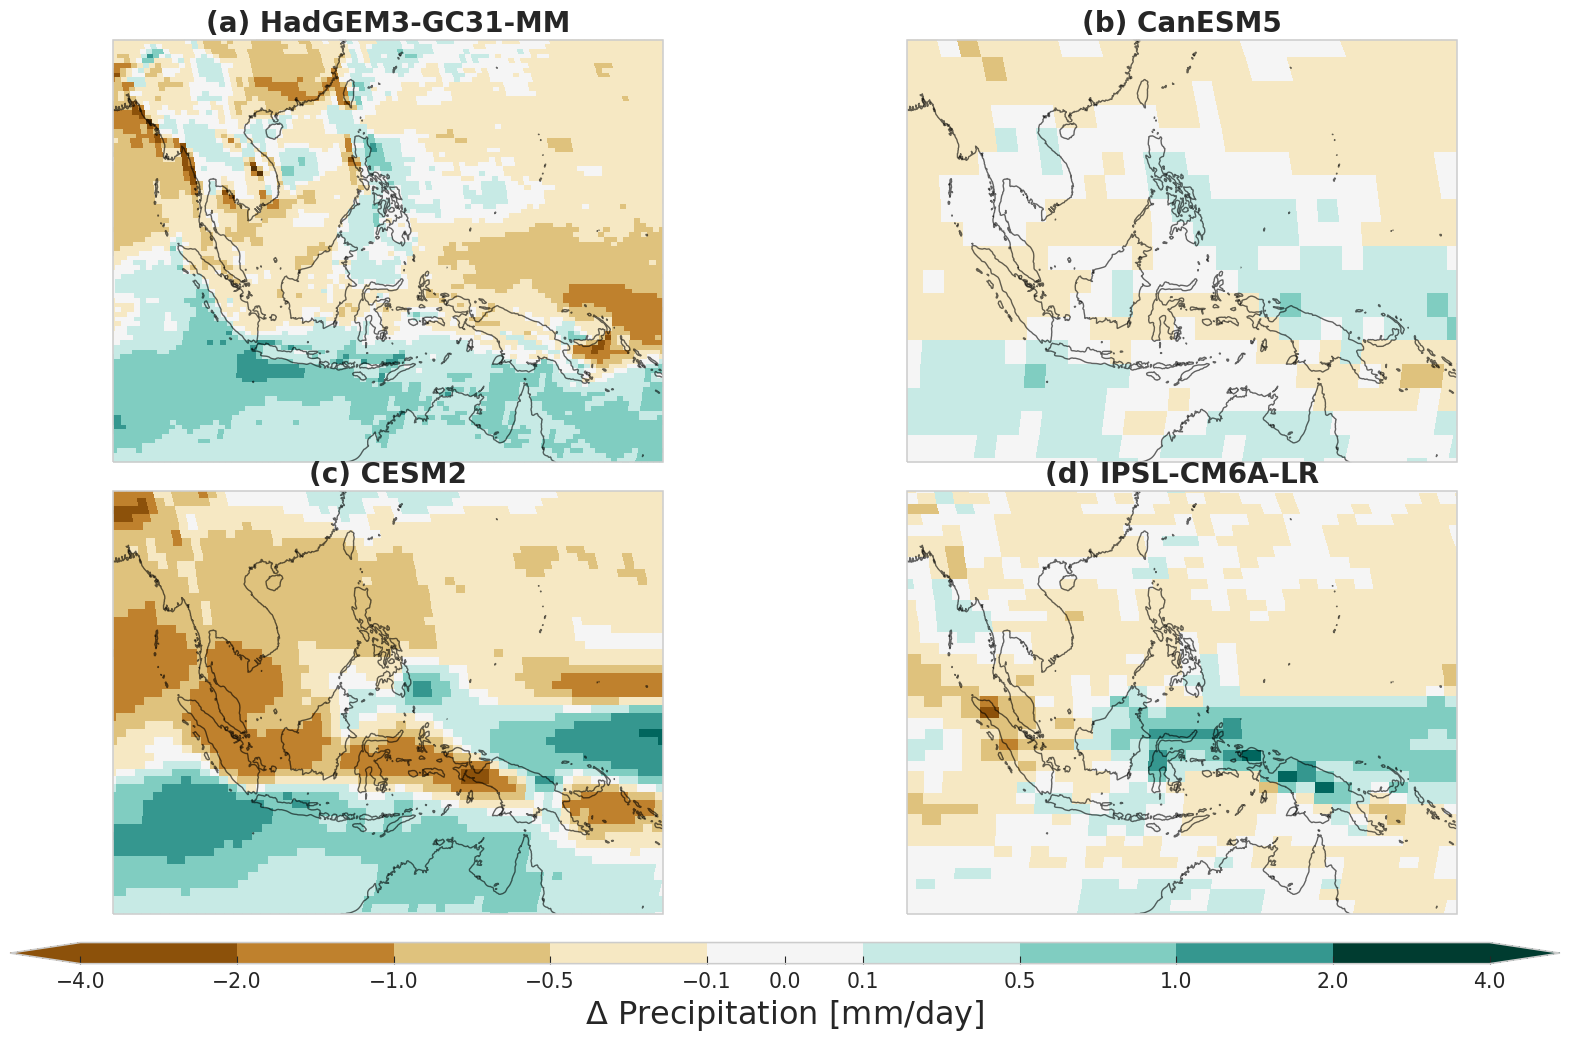

In [80]:
colorss = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
colorss2 = ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
colorss3 = ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
colorss3b = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']

levelss = [-4,-3,-2,-1,-0.5,0,0.5,1,2,3,4]
levelss = [-4,-2,-1,-0.5,0,0.5,1,2,4]
levelss2 = [-4,-2,-1,-0.5,-0.1,0.1,0.5,1,2,4]
levelss3= [-4,-2,-1,-0.5,-0.1,0,0.1,0.5,1,2,4]
mpl.rcParams['hatch.color'] = 'gray'


fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(nrows=3, ncols=2,height_ratios=(1,1,0.05))
axs =  [fig.add_subplot(gs[0,0],projection=ccrs.Robinson()),
        fig.add_subplot(gs[0,1],projection=ccrs.Robinson()),
        fig.add_subplot(gs[1,0],projection=ccrs.Robinson()),
        fig.add_subplot(gs[1,1],projection=ccrs.Robinson())]

for i, model in enumerate(model_names):
    ax = axs[i]
    data = diff_prcp[model]
    if (np.min(data)>=-4):
        cols = colorss3
    else:
        cols = colorss3b
    data.plot(colors=cols,
                     add_colorbar=False,
                 levels = levelss2,ax=ax,transform = ccrs.PlateCarree())

    ax.set_global()
    ax.coastlines(linewidth=1,alpha=0.6)
    ax.set_title(labels[i]+' '+model_names_ttls[i],fontsize=20,fontweight='bold')
    extent = [90, 160, 30, -20]
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    

cax = fig.add_subplot(gs[2,:])
cmap = mpl.colors.ListedColormap(colorss3)
norm = mpl.colors.BoundaryNorm(levelss2, cmap.N)
mpl.colorbar.ColorbarBase(cax, cmap=cmap,ticks=levelss3,boundaries=levelss3,norm=norm,
                            orientation='horizontal',label='$\Delta$ Precipitation [mm/day]',extend='both')
fig.subplots_adjust(hspace=0.1,wspace=0.05)

fig.savefig('../reps/AMOC_hosing_precip/plots/prcp_indo.png',bbox_inches='tight')
fig.savefig('../reps/AMOC_hosing_precip/plots/prcp_indo.pdf',bbox_inches='tight')
plt.show()

# Model bias

In [82]:
diff_hobs_prcp = {}
obs_prcp = xr.open_dataset('/p/tmp/mayayami/GPCPprecip.mon.mean.nc').precip
for model in model_names_ttls:
    hdata = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/historical/{}_hist_emean_prcpy_GPCPgrid.nc'.format(model))['pr']
    
    diff_hobs_prcp[model]=(hdata)-(obs_prcp.mean(dim='time'))

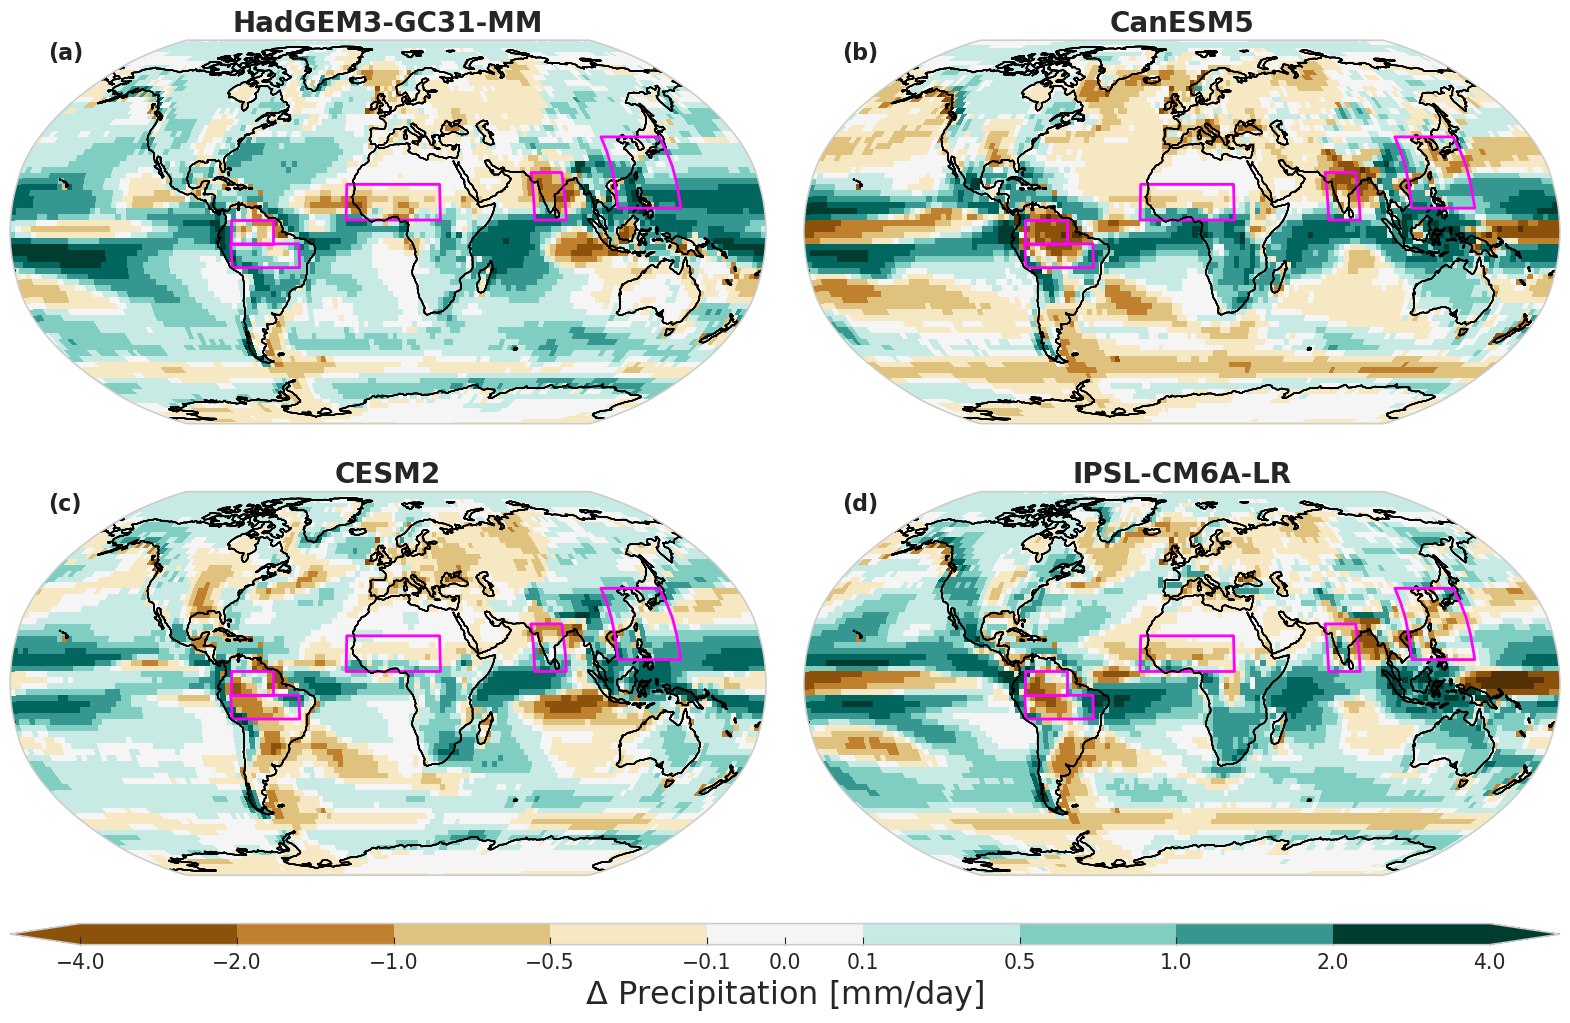

In [84]:
colorss = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
colorss2 = ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
colorss3 = ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
colorss3b = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']

levelss = [-4,-3,-2,-1,-0.5,0,0.5,1,2,3,4]
levelss = [-4,-2,-1,-0.5,0,0.5,1,2,4]
levelss2 = [-4,-2,-1,-0.5,-0.1,0.1,0.5,1,2,4]
levelss3= [-4,-2,-1,-0.5,-0.1,0,0.1,0.5,1,2,4]
mpl.rcParams['hatch.color'] = 'gray'


fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(nrows=3, ncols=2,height_ratios=(1,1,0.05))
axs =  [fig.add_subplot(gs[0,0],projection=ccrs.Robinson()),
        fig.add_subplot(gs[0,1],projection=ccrs.Robinson()),
        fig.add_subplot(gs[1,0],projection=ccrs.Robinson()),
        fig.add_subplot(gs[1,1],projection=ccrs.Robinson())]

for i, model in enumerate(model_names_ttls):
    ax = axs[i]
    data = diff_hobs_prcp[model]
    if (np.min(data)>=-4):
        cols = colorss3
    else:
        cols = colorss3b
    data.plot(colors=cols,
                     add_colorbar=False,
                 levels = levelss2,ax=ax,transform = ccrs.PlateCarree())

    ax.set_global()
    ax.coastlines(linewidth=1,alpha=0.6)
    ax.set_title(model_names_ttls[i],fontsize=20,fontweight='bold')

    for ibox in [0,8,9,10,11]:
        latlon = list(boxes_dict.values())[ibox]
        box_plot2(latlon,col='magenta',lw=2)
    ax.text(0.05,0.95,labels[i],transform=ax.transAxes,color='k',fontweight='bold')

cax = fig.add_subplot(gs[2,:])
cmap = mpl.colors.ListedColormap(colorss3)
norm = mpl.colors.BoundaryNorm(levelss2, cmap.N)
mpl.colorbar.ColorbarBase(cax, cmap=cmap,ticks=levelss3,boundaries=levelss3,norm=norm,
                            orientation='horizontal',label='$\Delta$ Precipitation [mm/day]',extend='both')
fig.subplots_adjust(hspace=0.1,wspace=0.05)

fig.savefig('../reps/AMOC_hosing_precip/plots/hbias.png',bbox_inches='tight')
fig.savefig('../reps/AMOC_hosing_precip/plots/hbias.pdf',bbox_inches='tight')
plt.show()

# agreement with HadGEM

In [27]:
sig = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/all_sign_match.nc')
sig2 = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/all_sign_match_two.nc')

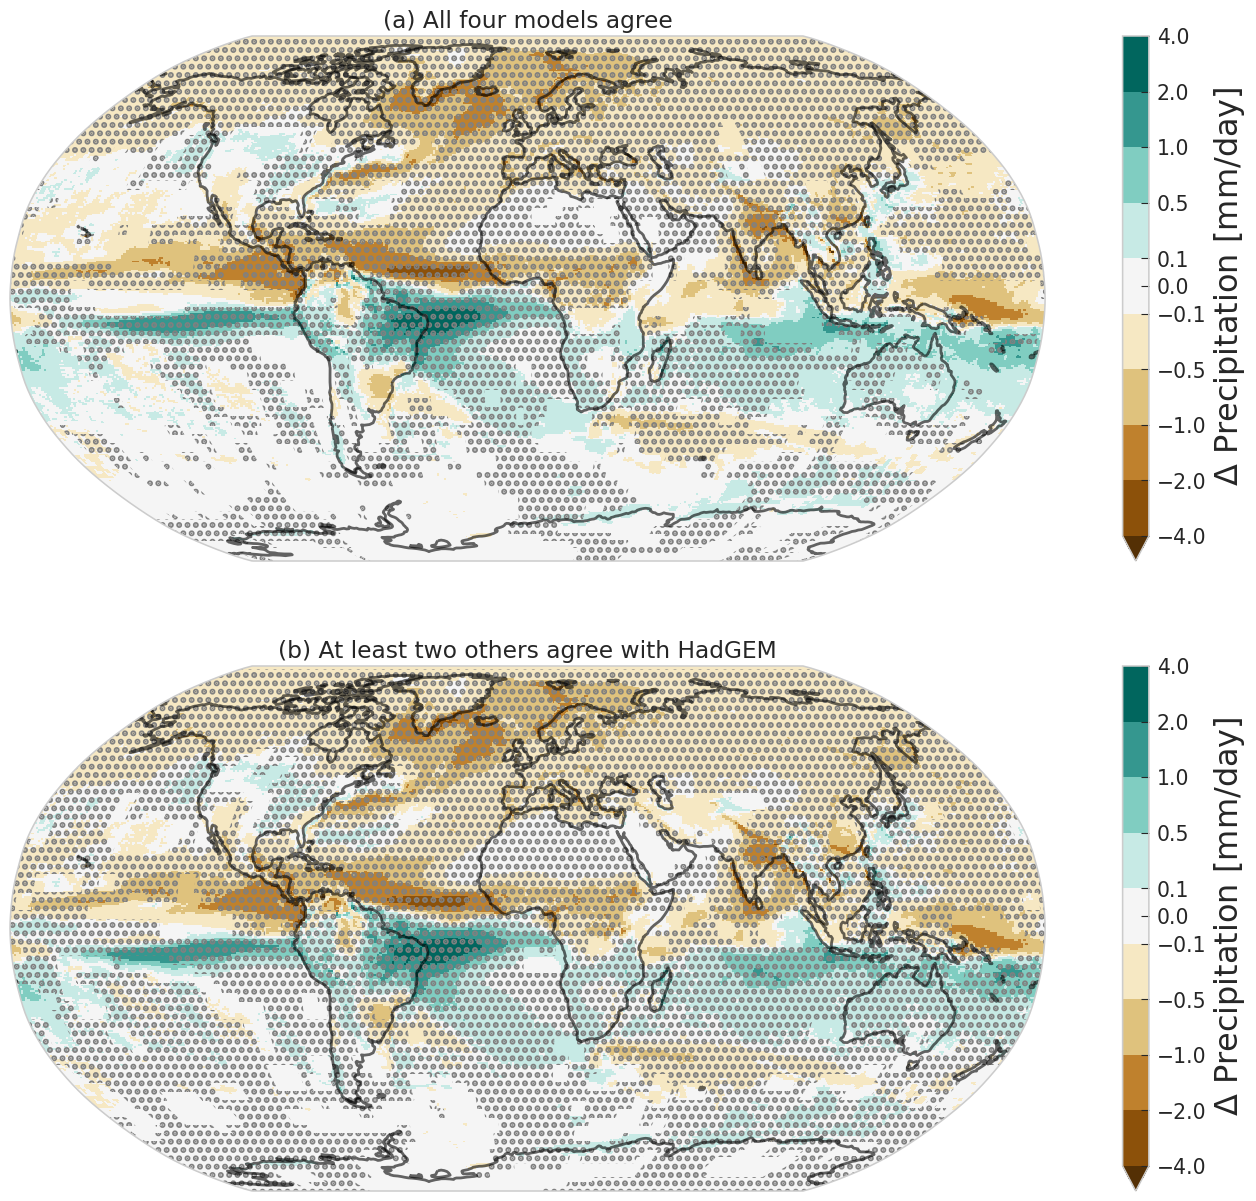

In [44]:
colorss = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
colorss2 = ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
colorss3 = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
levelss = [-4,-2,-1,-0.5,0,0.5,1,2,4]
levelss2 = [-4,-2,-1,-0.5,-0.1,0.1,0.5,1,2,4]
levelss3= [-4,-2,-1,-0.5,-0.1,0,0.1,0.5,1,2,4]
mpl.rcParams['hatch.color'] = 'gray'
plt.rcParams['hatch.linewidth'] = 3

fig = plt.figure(figsize = (20,15))

ax = fig.add_subplot(211,projection=ccrs.Robinson())

data = diff_prcp['HadGEM3-GC3-1MM']
data.plot(
    colors=colorss3,
                 cbar_kwargs={"label": "$\Delta$ Precipitation [mm/day]",'aspect':20,
                                              'ticks':levelss3,
                  "orientation":'vertical'},
                 levels = levelss2,
    ax=ax,transform = ccrs.PlateCarree())
sig.data.plot.contourf(levels = [-100,100],hatches=['..'],colors='none',corner_mask=False,add_colorbar=False,ax=ax,transform = ccrs.PlateCarree())

ax.set_global()
ax.coastlines(linewidth=2,alpha=0.6)
ax.set_title('(a) All four models agree')

ax = fig.add_subplot(212,projection=ccrs.Robinson())
data.plot(
    colors=colorss3,
                 cbar_kwargs={"label": "$\Delta$ Precipitation [mm/day]",'aspect':20,
                                              'ticks':levelss3,
                  "orientation":'vertical'},
                 levels = levelss2,
    ax=ax,transform = ccrs.PlateCarree())
sig2.data.plot.contourf(levels = [-100,100],hatches=['..'],colors='none',corner_mask=False,add_colorbar=False,ax=ax,transform = ccrs.PlateCarree())

ax.set_title('(b) At least two others agree with HadGEM')
ax.set_global()
ax.coastlines(linewidth=2,alpha=0.6)

fig.savefig('../reps/AMOC_hosing_precip/plots/hadgem_stippling.pdf',bbox_inches='tight')
fig.savefig('../reps/AMOC_hosing_precip/plots/hadgem_stippling.png',bbox_inches='tight')

plt.show()

# other ITCZs

In [19]:
# atlantic ocean
obs_itcz = xr.open_dataset('../obs_itcz.nc').itcz
aitcz = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/itcz.nc').aitcz
citcz = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/itcz.nc').citcz
hist_itcz = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/hist_itcz.nc').hist_itcz

In [36]:
# indian ocean
io_aitcz = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/io_itcz.nc').aitcz
io_citcz = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/io_itcz.nc').citcz
io_hist_itcz = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/io_hist_itcz.nc').hist_itcz
io_obs_itcz = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/itcz/obs_io_itcz.nc').itcz

# pacific ocean
pac_aitcz = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/pac_itcz.nc').aitcz
pac_citcz = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/pac_itcz.nc').citcz
pac_hist_itcz = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/pac_hist_itcz.nc').hist_itcz
pac_obs_itcz = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/itcz/obs_pac_itcz.nc').itcz

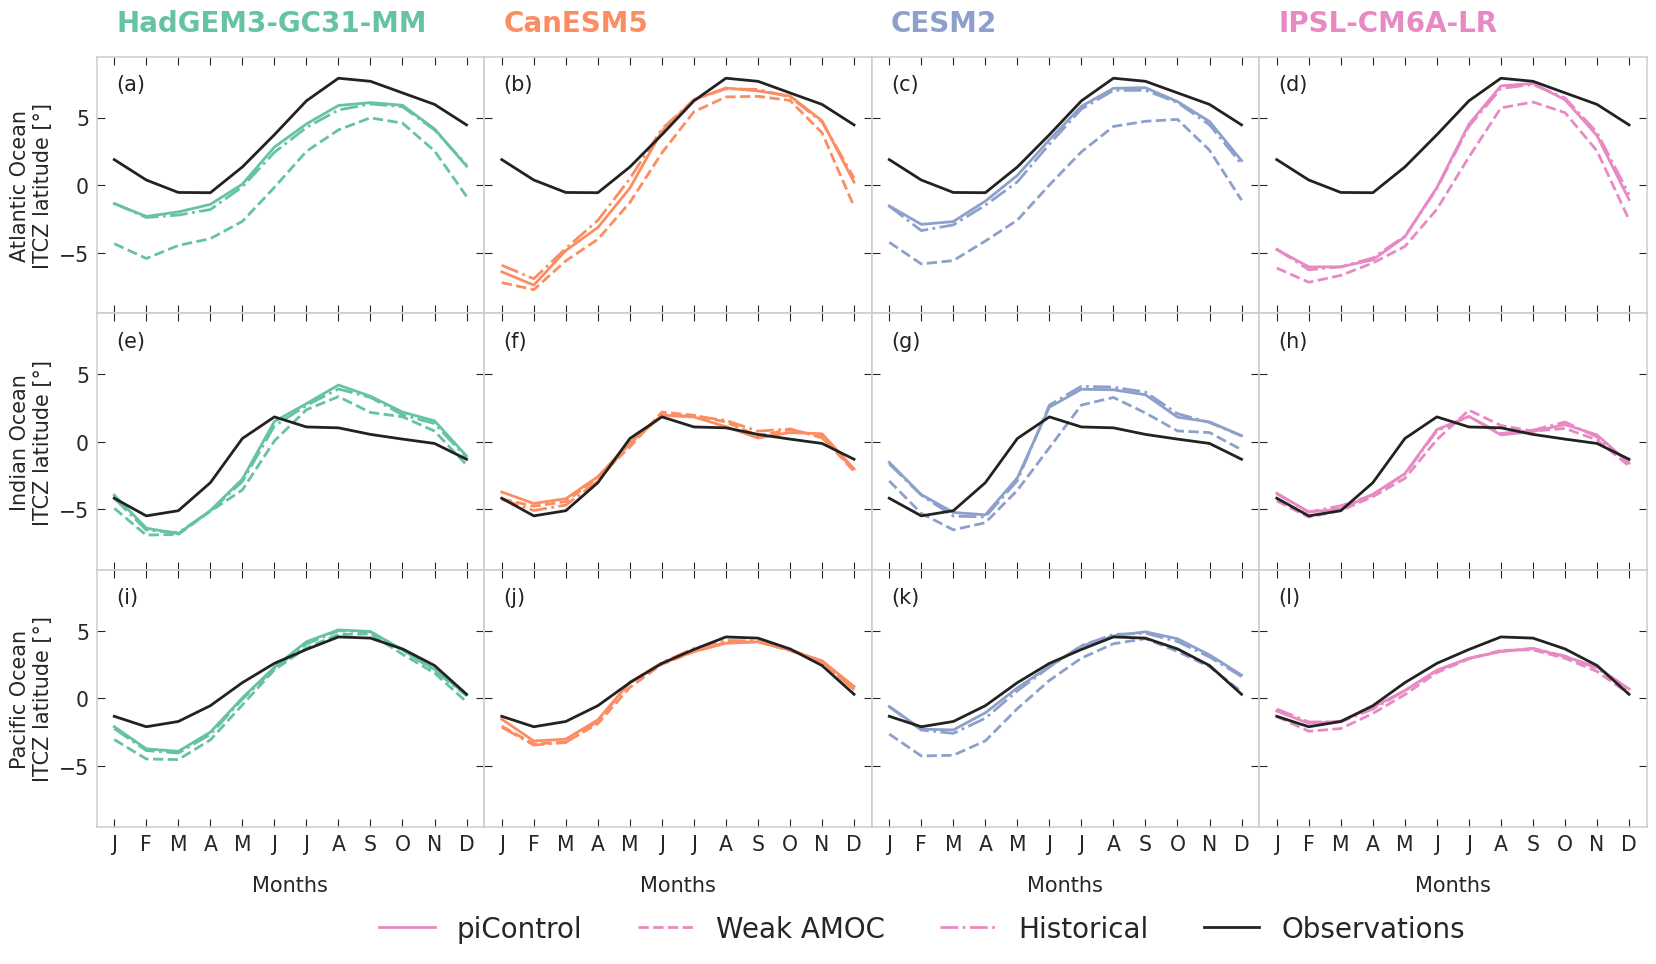

In [45]:
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(3, 4)

# cont_colors = ['#edf8fb','#b2e2e2','#66c2a4','#2ca25f','#006d2c']
# weak_colors = ['#ffffd4','#fed98e','#fe9929','#d95f0e','#993404']
aitczs = [aitcz,io_aitcz,pac_aitcz]
citczs = [citcz,io_citcz,pac_citcz]
obs_itczs = [obs_itcz,io_obs_itcz,pac_obs_itcz]
hist_itczs = [hist_itcz, io_hist_itcz, pac_hist_itcz]
oceans = ['Atlantic','Indian','Pacific']
model_colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
cslices = cslices1
aslices = aslices1
xlbl=0.05
ylbl=0.87
for j in range(3):
    aitcz1, citcz1, obs_itcz1, hist_itcz1 = aitczs[j], citczs[j], obs_itczs[j], hist_itczs[j]
    for i, model in enumerate(model_names):        
        ax = fig.add_subplot(gs[j,i])
        avg(aitcz1.sel(models=model)[aslices[model][0]:aslices[model][1]]).plot(color=model_colors[i],lw=2,label='piControl')
        avg(citcz1.sel(models=model)[cslices[model][0]:cslices[model][1]]).plot(color=model_colors[i],lw=2,linestyle='--',label='Weak AMOC')
        avg(hist_itcz1.sel(models=model)).plot(color=model_colors[i],linestyle='-.',lw=2,label='Historical')
        avg(obs_itcz1).plot(color='k',lw=2,label='Observations')
        ax.set_xticks(range(1,13))
        ax.set_xticklabels([m[0] for m in months])
        ax.tick_params(axis='y', which='both',labelleft=False)
        if i==0:
            ax.tick_params(axis='y', which='both',labelleft=True)
            ax.set_ylabel('{} Ocean\nITCZ latitude [°]'.format(oceans[j]),fontsize=15)
        else:
            ax.set_ylabel('')
        ax.set_ylim(-9.5,9.5)
        if j==0:
            ax.text(0.05,1.1,model_names_ttls[i],transform=ax.transAxes,color=model_colors[i],fontweight='bold',fontsize=20)
        ax.set_title('')
        ax.text(xlbl,ylbl,labels[j*4+i],transform=ax.transAxes,color='k',fontsize=15)
        ax.set_xlabel('Months',fontsize=15,labelpad=15)
plt.legend(bbox_to_anchor=(-2.3, -0.3), loc='upper left', borderaxespad=0., fontsize=20,fancybox=False,frameon=False,ncol=4)
fig.subplots_adjust(wspace=0,hspace=0)
fig.savefig('../reps/AMOC_hosing_precip/plots/all_itczs.pdf',bbox_inches='tight')
fig.savefig('../reps/AMOC_hosing_precip/plots/all_itczs.png',bbox_inches='tight')

plt.show()


# AMIP ITCZs

In [47]:
amip_itcz = {}

for i,model in enumerate(model_names):
    amip_itcz[model] = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/itcz/{}_amip_itcz.nc'.format(model)).itcz

In [48]:
hist_itcz = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/hist_itcz.nc').hist_itcz

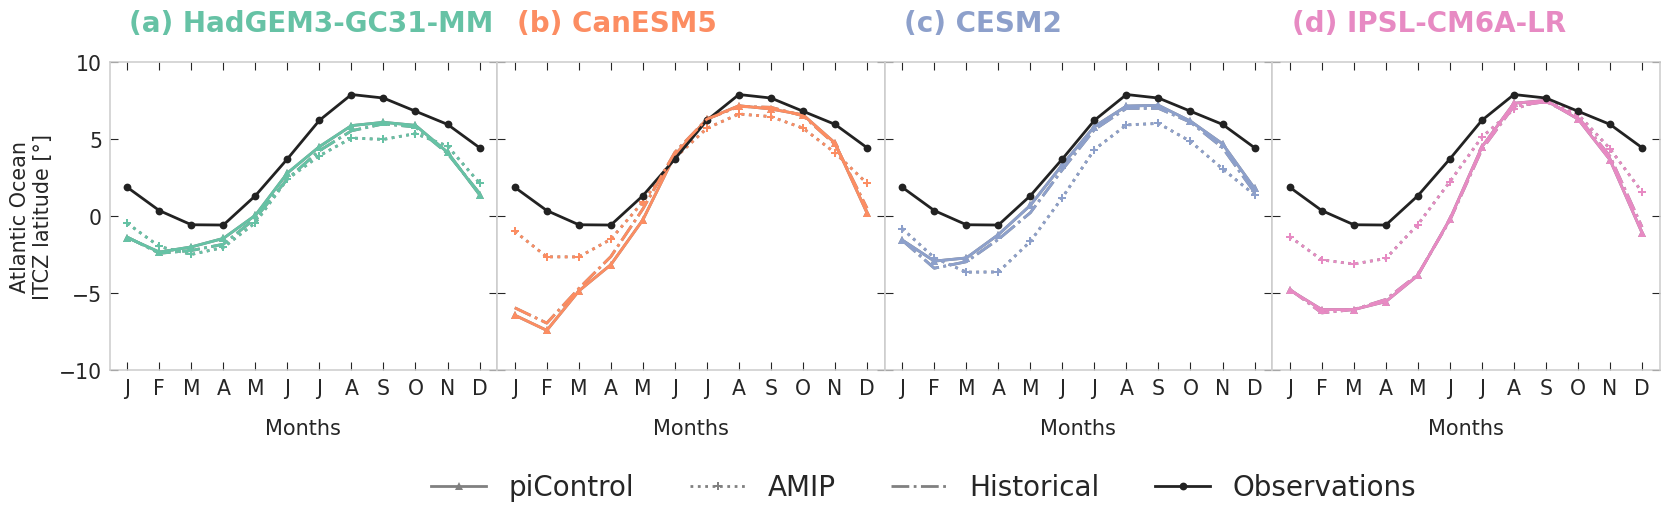

In [49]:
fig = plt.figure(figsize = (20,4))
gs = fig.add_gridspec(1, 4)
model_names2 = ['HadGEM3-GC3-1MM', 'CESM2','CanESM5', 'IPSL-CM6A-LR']
model_indices2  = [0,2,1,3]
# cont_colors = ['#edf8fb','#b2e2e2','#66c2a4','#2ca25f','#006d2c']
# weak_colors = ['#ffffd4','#fed98e','#fe9929','#d95f0e','#993404']
aitcz1 = aitcz
citcz1 = citcz
obs_itcz1 = obs_itcz
oceans = ['Atlantic','Indian','Pacific']
model_colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
cslices = cslices1
aslices = aslices1

for i, model in enumerate(model_names):        
    ax = fig.add_subplot(gs[0,i])
    citcz1 = amip_itcz[model]
    linea = avg(aitcz1.sel(models=model)[aslices[model][0]:aslices[model][1]]).plot(color='grey',lw=2,label='piControl',marker='^')
    linec = avg(citcz1).plot(color='grey',lw=2,linestyle=':',label='AMIP',marker='P')
    lineh =     avg(hist_itcz.sel(models=model)).plot(color='grey',linestyle='-.',lw=2,label='Historical')

    avg(aitcz1.sel(models=model)[aslices[model][0]:aslices[model][1]]).plot(color=model_colors[i],lw=2,marker='^')
    avg(citcz1).plot(color=model_colors[i],lw=2,linestyle=':',marker='P')
    avg(obs_itcz1).plot(color='k',lw=2,label='Observations',marker='o')
    avg(hist_itcz.sel(models=model)).plot(color=model_colors[i],linestyle='-.',lw=2)
    ax.set_xticks(range(1,13))
    ax.set_xticklabels([m[0] for m in months])
    ax.tick_params(axis='y', which='both',labelleft=False)
    if i==0:
        ax.tick_params(axis='y', which='both',labelleft=True)
        ax.set_ylabel('Atlantic Ocean\nITCZ latitude [°]',fontsize=15)
    else:
        ax.set_ylabel('')
#     if i!=3:
#         ax.lines.pop(0)
#         ax.lines.pop(0)
    ax.set_ylim(-10,10)
    ax.text(0.05,1.1,labels[i]+' '+model_names_ttls[i],transform=ax.transAxes,color=model_colors[i],fontweight='bold',fontsize=20)
    ax.set_title('')
    ax.set_xlabel('Months',fontsize=15,labelpad=15)
plt.legend(bbox_to_anchor=(-2.2, -0.3), loc='upper left', borderaxespad=0., fontsize=20,fancybox=False,frameon=False,ncol=4)
# ax.lines.pop(0)
# ax.lines.pop(0)
fig.subplots_adjust(wspace=0,hspace=0)
fig.savefig('../reps/AMOC_hosing_precip/plots/amip_itcz.pdf',bbox_inches='tight')
fig.savefig('../reps/AMOC_hosing_precip/plots/amip_itcz.png',bbox_inches='tight')
plt.show()


# geographical and monthly agreement in hosing

In [52]:
diff_prcp_Cgrid = {}

for model in model_names:
    adata = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/{}/vars/aprcpm_Cgrid.nc'.format(model))[prcp_keys[model]][aslicesm[model][0]:aslicesm[model][1]]
    cdata = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/{}/vars/cprcpm_Cgrid.nc'.format(model))[prcp_keys[model]][cslicesm[model][0]:cslicesm[model][1]]

    diff_prcp_Cgrid[model] = (cdata.mean(dim='time'))-(adata.mean(dim='time'))

hsign = np.sign(diff_prcp_Cgrid['HadGEM3-GC3-1MM'])
match = hsign.where(
                      (np.sign(diff_prcp_Cgrid['CanESM5'])==hsign)&
                    (np.sign(diff_prcp_Cgrid['CESM2'])==hsign)&
                    (np.sign(diff_prcp_Cgrid['IPSL-CM6A-LR'])==hsign)
)

/home/mayayami/.conda/envs/main/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/mayayami/.conda/envs/main/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/mayayami/.conda/envs/main/lib/python3.9/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [65]:
mon_frac = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/all_monthly_match.nc').precipitation_flux

In [66]:
sig = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/all_sign_match.nc')

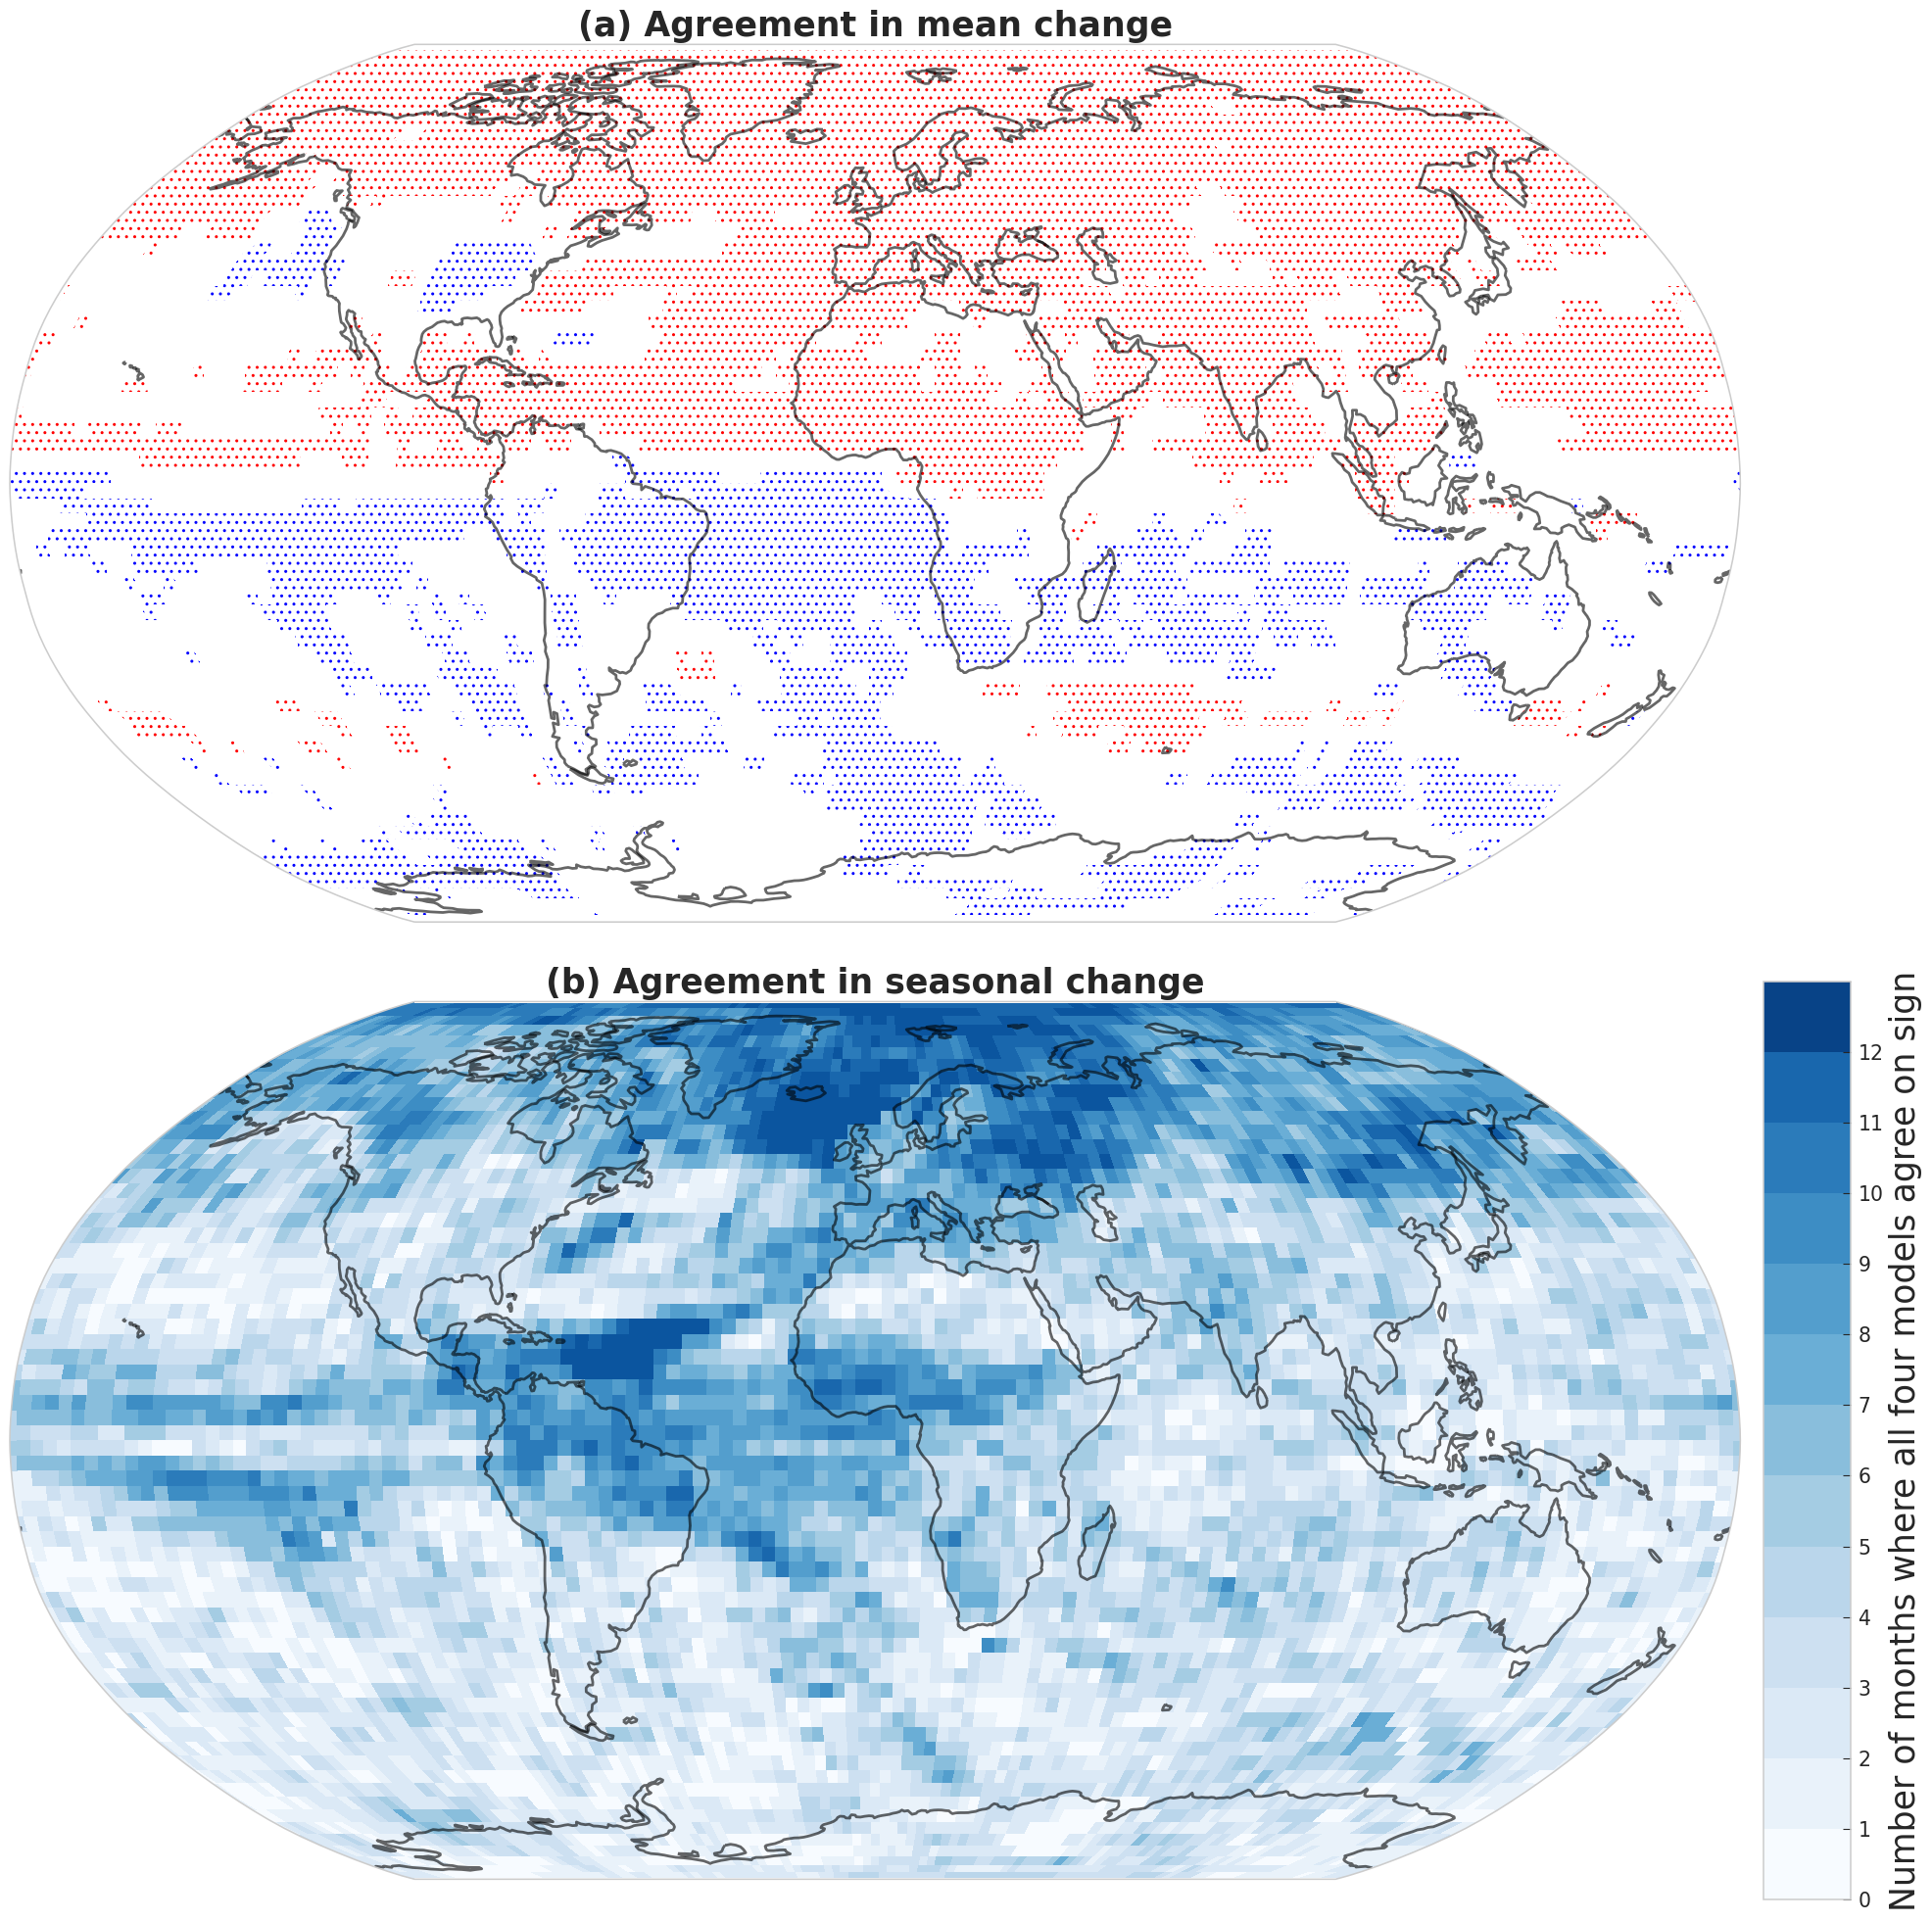

In [68]:

fig = plt.figure(figsize = (20,20))
gs = fig.add_gridspec(2, 2,width_ratios=(1,0.05))

ax = fig.add_subplot(gs[0,0],projection=ccrs.Robinson())


mpl.rcParams['hatch.color'] = 'red'
sig.data.where(sig.data<0).plot.contourf(levels = [-100,100],hatches=['..'],colors='none',add_colorbar=False,ax=ax,transform = ccrs.PlateCarree())
mpl.rcParams['hatch.color'] = 'blue'
sig.data.where(sig.data>0).plot.contourf(levels = [-100,100],hatches=['..'],colors='none',add_colorbar=False,ax=ax,transform = ccrs.PlateCarree())

ens_mean_diff.where(np.isnan(match)).plot(levels=[-100,100],colors=['white','white'],add_colorbar=False,ax=ax,transform = ccrs.PlateCarree())
ax.set_global()
ax.coastlines(linewidth=2,alpha=0.6)
ax.set_title('(a) Agreement in mean change',fontsize=25,fontweight='bold')

ax = fig.add_subplot(gs[1,0],projection=ccrs.Robinson())
levelss = np.arange(0,14)
levelss2 = np.arange(0,13)
cmap = plt.get_cmap('Blues')
color_list = [cmap(i/14) for i in np.arange(0,14)]
mon_frac.plot(
    colors=color_list,
    add_colorbar=False,
                 levels = levelss,
    ax=ax,transform = ccrs.PlateCarree())
ax.set_global()

ax.coastlines(linewidth=2,alpha=0.6)

ax.set_title('(b) Agreement in seasonal change',fontsize=25,fontweight='bold')
ax.set_global()

cax = fig.add_subplot(gs[1,1])
cmap = mpl.colors.ListedColormap(color_list)
norm = mpl.colors.BoundaryNorm(levelss, cmap.N)
mpl.colorbar.ColorbarBase(cax, cmap=cmap,ticks=levelss2,boundaries=levelss,norm=norm,
                            orientation='vertical',extend='neither')
cax.set_ylabel("Number of months where all four models agree on sign",fontsize=25)

fig.tight_layout()
fig.savefig('../reps/AMOC_hosing_precip/plots/agreement.pdf',bbox_inches='tight')
fig.savefig('../reps/AMOC_hosing_precip/plots/agreement.png',bbox_inches='tight')
plt.show()

# change in boxes

In [69]:
model_boxes_cont = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/boxes_cont.nc')
aboxes_cont = model_boxes_cont.aprcp
cboxes_cont = model_boxes_cont.cprcp

obs_boxes = xr.open_dataset('/p/tmp/mayayami/obs_boxes_GPCC.nc').prcp[360:]

In [71]:
box_mag = np.zeros((5,4))
box_prc = np.zeros((5,4))
for i, ibox in enumerate([0,8,9,10,11]):
    box = list(boxes_dict.keys())[ibox]
    
    mods = []
    prcs = []
    for im, model in enumerate(model_names):        
        cdata = mavg(cboxes_cont.isel(boxes=ibox).sel(models=model).dropna(dim='time')[cslicesm[model][0]:cslicesm[model][1]])
        adata = mavg(aboxes_cont.sel(models=model).isel(boxes=ibox).dropna(dim='time')[aslicesm[model][0]:aslicesm[model][1]])
        diff = cdata - adata
        prc = diff/adata
        mods.append(np.average(diff))
        prcs.append(np.average(prc))

    box_mag[i]=np.array(mods)
    box_prc[i]=np.array(prcs)

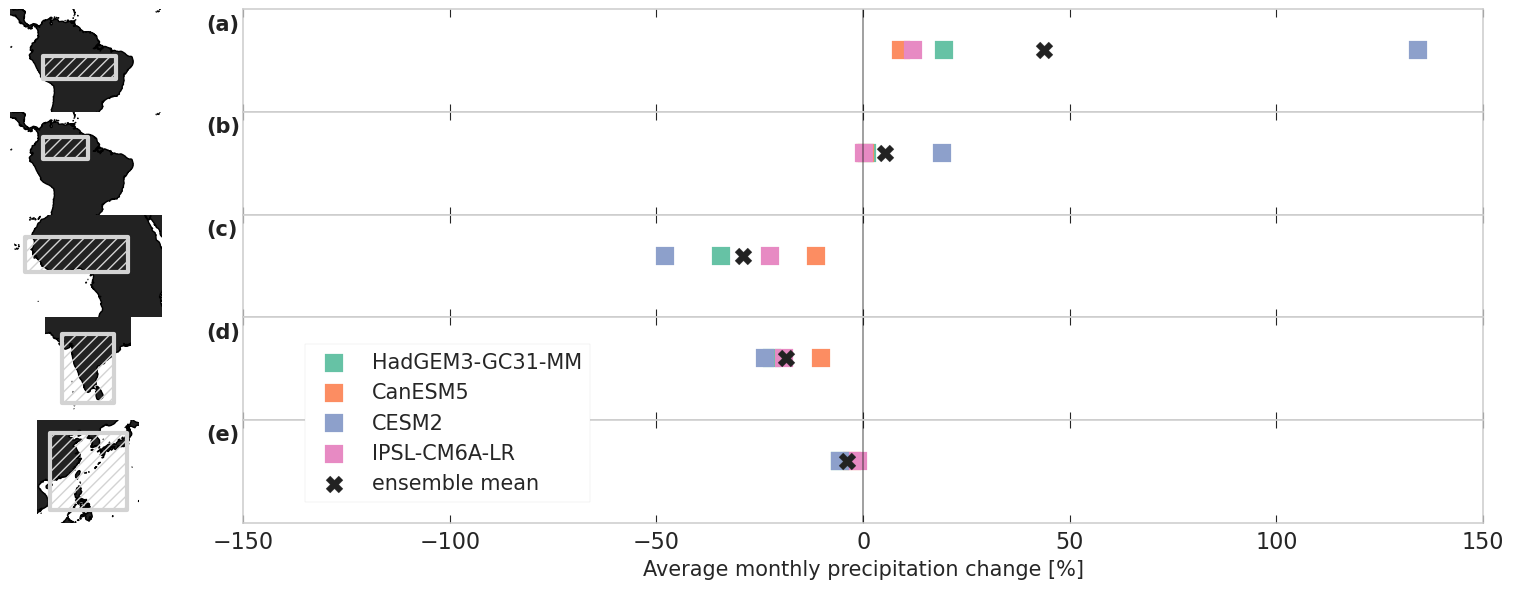

In [74]:
%matplotlib inline
model_colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
model_markers = ['o','s','^','P']
model_names5 = ['HadGEM3-GC3-1MM', 'CESM2','CanESM5', 'IPSL-CM6A-LR']

fig = plt.figure(figsize=(20,8))
gs = fig.add_gridspec(6, 5)

for i, ibox in enumerate([0,8,9,10,11]):
    box = list(boxes_dict.keys())[ibox]
    
    ax = fig.add_subplot(gs[i, 0], projection=ccrs.PlateCarree())
    latlon = boxes_dict[box]
    box_plot5(latlon,col='lightgrey',has='///')
    ax.set_extent(extent_boxes[box], crs=ccrs.PlateCarree())  
    
yy = np.arange(1,9)
for i, ibox in enumerate([0,8,9,10,11]):
    ax = fig.add_subplot(gs[i, 1:])
    for im, model in enumerate(model_names5):
        ax.scatter(box_prc[i][im]*100,0.2,color=model_colors[im],s=150,label=model_names_ttls[im],marker='s')

    ax.set_xlabel('Average monthly precipitation change [%]',fontsize=15)
    ax.set_xlim(-150,150)
    ax.set_ylim(-1,1)
    ax.vlines(0,-1,1,color='k',alpha=0.5)
    ax.tick_params(axis='x', which='both',bottom=True,top=True,labelbottom=False, labelsize=fontsize)
    ax.tick_params(axis='y', which='both',left=False,right=False,labelleft=False, labelsize=fontsize)
    ax.text(-0.03,0.8,labels[i],transform=ax.transAxes,color='k',fontweight='bold',fontsize=15)
    ax.scatter(np.mean(box_prc[i])*100,0.2,color='k',s=150,marker='X',label='ensemble mean')

ax.tick_params(axis='x', which='both',bottom=True,top=True,labelbottom=True, labelsize=fontsize)
ax.legend(bbox_to_anchor=(0.05, 0.2), loc='lower left', borderaxespad=0., facecolor='white', framealpha=1,fontsize=15,fancybox=False,frameon=True,ncol=1)
fig.subplots_adjust(hspace=0,wspace=0) 
fig.savefig('../reps/AMOC_hosing_precip/plots/box_percent.pdf',bbox_inches='tight')
fig.savefig('../reps/AMOC_hosing_precip/plots/box_percent.png',bbox_inches='tight')

plt.show()

# dry/wet season agreement

In [20]:
extent_latlon = {'am': [-25, -90, -30, 21],
 'wam': [40, -25, -17.5, 32.5],
 'ism': [60, 95, 0, 30],
 'easm': [100, 150, 5, 45]}

In [21]:
region_dict = {
        'am':[360-85,360-30,-20,11],
        'wam': [360-20,35,-10,25],
        'ism': [70, 85, 5, 25],
        'easm':[110,140,10,40]}

In [22]:
dmap5_Cgrid = {}
dmap4_Cgrid = {}
wmap7_Cgrid = {}
wmap6_Cgrid = {}

for model in model_names:
    dmapp5 = {}
    dmapp4 = {}
    wmapp7 = {}
    wmapp6 = {}
    for region, extent in region_dict.items():
        dmapp5[region] = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/dry_maps/{}_dmap_{}_q5_Cgrid.nc'.format(model,region))
        dmapp4[region] = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/dry_maps/{}_dmap_{}_q4_Cgrid.nc'.format(model,region))
        wmapp7[region] = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/dry_maps/{}_wmap_{}_q7_Cgrid.nc'.format(model,region))
        wmapp6[region] = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/dry_maps/{}_wmap_{}_q6_Cgrid.nc'.format(model,region))

        
    dmap5_Cgrid[model]=dmapp5
    dmap4_Cgrid[model]=dmapp4
    wmap7_Cgrid[model]=wmapp7
    wmap6_Cgrid[model]=wmapp6

In [23]:
dry_len_diff = {}
dry_prcp_diff = {}
wet_len_diff = {}
wet_prcp_diff = {}

region = 'am'

for im, model in enumerate(model_names):
    dry_len = {}
    dry_prcp = {}
    wet_len = {}
    wet_prcp = {}
    for region, extent in region_dict.items():
        seamask = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/{}/Cgrid_seamask.nc'.format(model)).topo
        region_box = region_dict[region]

        ####
        data = (dmap4_Cgrid[model][region].cdlen1.mean(dim='year') - dmap4_Cgrid[model][region].adlen.mean(dim='year')).where(seamask==1)
        dry_len[region]=data
        ####

        #####
        data = (((dmap4_Cgrid[model][region].cdprcp1/dmap4_Cgrid[model][region].cdlen1).mean(dim='year'))
                -((dmap4_Cgrid[model][region].adprcp/dmap4_Cgrid[model][region].adlen).mean(dim='year'))).where(seamask==1)
        dry_prcp[region]=data
        #####

        ####
        data = (wmap6_Cgrid[model][region].cwlen1.mean(dim='year') - wmap6_Cgrid[model][region].awlen.mean(dim='year')).where(seamask==1)
        wet_len[region]=data
        ####

        ####
        data = (((wmap6_Cgrid[model][region].cwprcp1/wmap6_Cgrid[model][region].cwlen1).mean(dim='year'))
                -((wmap6_Cgrid[model][region].awprcp/wmap6_Cgrid[model][region].awlen).mean(dim='year'))).where(seamask==1)
        wet_prcp[region]=data
        ####
    dry_len_diff[model] = dry_len
    dry_prcp_diff[model] = dry_prcp
    wet_len_diff[model] = wet_len
    wet_prcp_diff[model] = wet_prcp

In [24]:
def box_plot2(latlon,col='#6a3d9a',lw=3,has=None):
    min_lon = latlon[0]
    max_lon = latlon[1]
    min_lat = latlon[2]
    max_lat = latlon[3]
    if min_lon>180:
        min_lon=min_lon-360
    if max_lon>180:
        max_lon=max_lon-360
    latsq = [min_lat, max_lat, max_lat, min_lat]
    lonsq = [min_lon, min_lon, max_lon, max_lon]
    ring = LinearRing(list(zip(lonsq, latsq)))
    ax.coastlines(linewidth=1)
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',color='white')
    ax.add_geometries([ring], ccrs.PlateCarree(), facecolor='None', edgecolor=col,linewidth=lw,hatch=has)

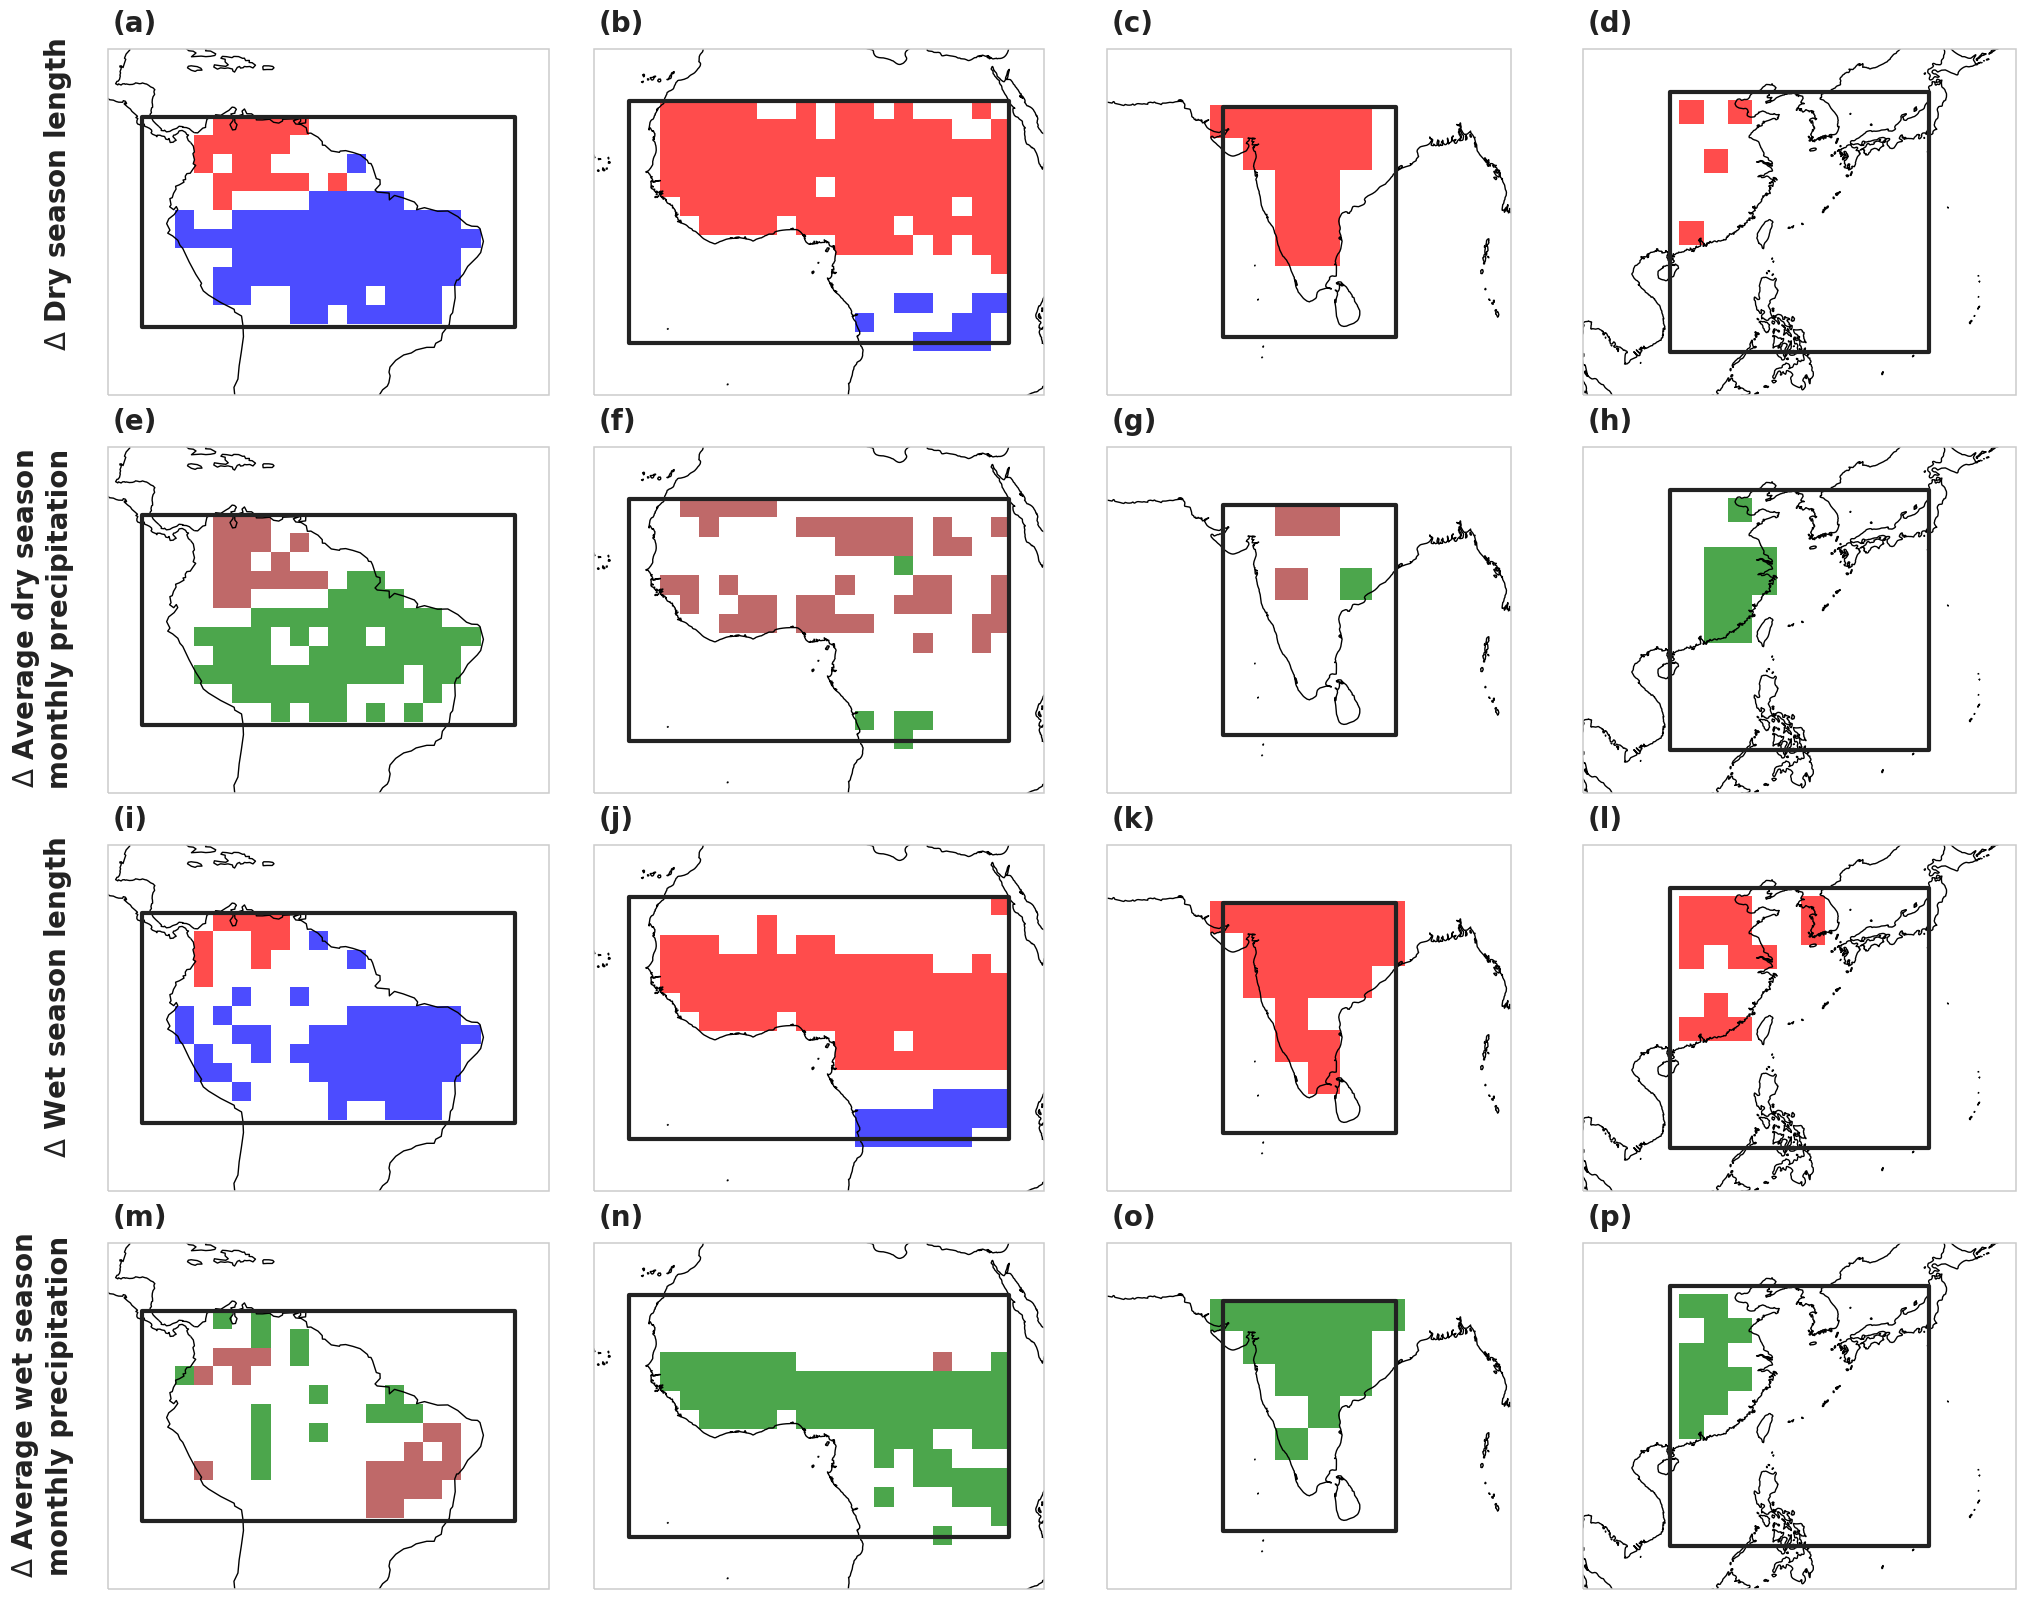

In [26]:
fig = plt.figure(figsize=(25, 20))
plt.rcParams['hatch.linewidth'] = 5
xlbl=0.01
ylbl=1.05
gs = gridspec.GridSpec(nrows=4, ncols=4,width_ratios=(1,1,1,1))
col_pairs = [['#053061','#67001f'],['#003c30','#543005'],['#67001f','#053061'],['#543005','#003c30']]
col_pairs = [['blue','red'],['brown','green'],['red','blue'],['green','brown']]
for iv, val in enumerate([dry_len_diff,dry_prcp_diff,wet_len_diff,wet_prcp_diff]):
    for i, region in enumerate(region_dict.keys()):
        region_box = region_dict[region]
        extent = extent_latlon[region]
        ax = fig.add_subplot(gs[iv, i], projection=ccrs.PlateCarree())
        hsign = np.sign(val['HadGEM3-GC3-1MM'][region])
        match = hsign.where(
                              (np.sign(val['CanESM5'][region])==hsign)&
                            (np.sign(val['CESM2'][region])==hsign)&
                            (np.sign(val['IPSL-CM6A-LR'][region])==hsign)
        )
        if region=='wam':
            match.where(match<0).where(match.lon<180,drop=True).plot(levels=[-100,100],colors=[col_pairs[iv][0],col_pairs[iv][0]],alpha=0.7,ax=ax, add_colorbar=False,transform = ccrs.PlateCarree())
            match.where(match>0).where(match.lon<180,drop=True).plot(levels=[-100,100],colors=[col_pairs[iv][1],col_pairs[iv][1]],alpha=0.7,ax=ax, add_colorbar=False,transform = ccrs.PlateCarree())
            match.where(match<0).where(match.lon>180,drop=True).plot(levels=[-100,100],colors=[col_pairs[iv][0],col_pairs[iv][0]],alpha=0.7,ax=ax, add_colorbar=False,transform = ccrs.PlateCarree())
            match.where(match>0).where(match.lon>180,drop=True).plot(levels=[-100,100],colors=[col_pairs[iv][1],col_pairs[iv][1]],alpha=0.7,ax=ax, add_colorbar=False,transform = ccrs.PlateCarree())

        else:
            match.where(match<0).plot(levels=[-100,100],colors=[col_pairs[iv][0],col_pairs[iv][0]],alpha=0.7,ax=ax, add_colorbar=False,transform = ccrs.PlateCarree())
            match.where(match>0).plot(levels=[-100,100],colors=[col_pairs[iv][1],col_pairs[iv][1]],alpha=0.7,ax=ax, add_colorbar=False,transform = ccrs.PlateCarree())

#         sig = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/seas_signs/all_sign_match_{}_{}.nc'.format(iv,region)).data
#         mpl.rcParams['hatch.color'] = col_pairs[iv][0]
#         sig.where(sig<0).plot.contourf(levels = [-100,100],hatches=['.'],corner_mask=True,colors='none',ax=ax,add_colorbar=False,transform = ccrs.PlateCarree())
#         mpl.rcParams['hatch.color'] = col_pairs[iv][1]
#         sig.where(sig>0).plot.contourf(levels = [-100,100],hatches=['.'],corner_mask=True,colors='none',ax=ax,add_colorbar=False,transform = ccrs.PlateCarree())
#         match.where(np.isnan(match)).plot(levels=[-100,100],colors=['white','white'],ax=ax, add_colorbar=False,transform = ccrs.PlateCarree())
        
        ax.text(xlbl,ylbl,labels[4*iv+i],transform=ax.transAxes,color='k',fontweight='bold',fontsize=20)

        box_plot2(region_box,col='k')
        ax.set_extent(extent, crs=ccrs.PlateCarree())
        ax.set_title('')
        
        if (i==0)&(iv==3):
            ax.text(-0.15, 3.6, '$\Delta$ Dry season length', color='k', transform=ax.transAxes, fontsize=20,rotation='vertical',fontweight='bold')
            ax.text(-0.15, 2.33, '$\Delta$ Average dry season\nmonthly precipitation', color='k', transform=ax.transAxes, fontsize=20,rotation='vertical',fontweight='bold',ha='center')
            ax.text(-0.15, 1.27, '$\Delta$ Wet season length', color='k', transform=ax.transAxes, fontsize=20,rotation='vertical',fontweight='bold')
            ax.text(-0.15, 0.05, '$\Delta$ Average wet season\nmonthly precipitation', color='k', transform=ax.transAxes, fontsize=20,rotation='vertical',fontweight='bold',ha='center')

fig.subplots_adjust(hspace=0.15,wspace=0.05)  
fig.patch.set_facecolor('white')
fig.savefig('../reps/AMOC_hosing_precip/plots/dry_agreement.pdf',bbox_inches='tight')
fig.savefig('../reps/AMOC_hosing_precip/plots/dry_agreement.png',bbox_inches='tight')
plt.show()

# DNS

## mean

In [30]:
asigmas = {}
csigmas = {}

for model in model_names:
    try:
        adata = xr.open_dataset('../DNS/{}_ava_sigma.nc'.format(model)).sigma
        cdata = xr.open_dataset('../DNS/{}_cva_sigma.nc'.format(model)).sigma

        asigmas[model]=adata
        csigmas[model]=cdata
    except:
        print(model)


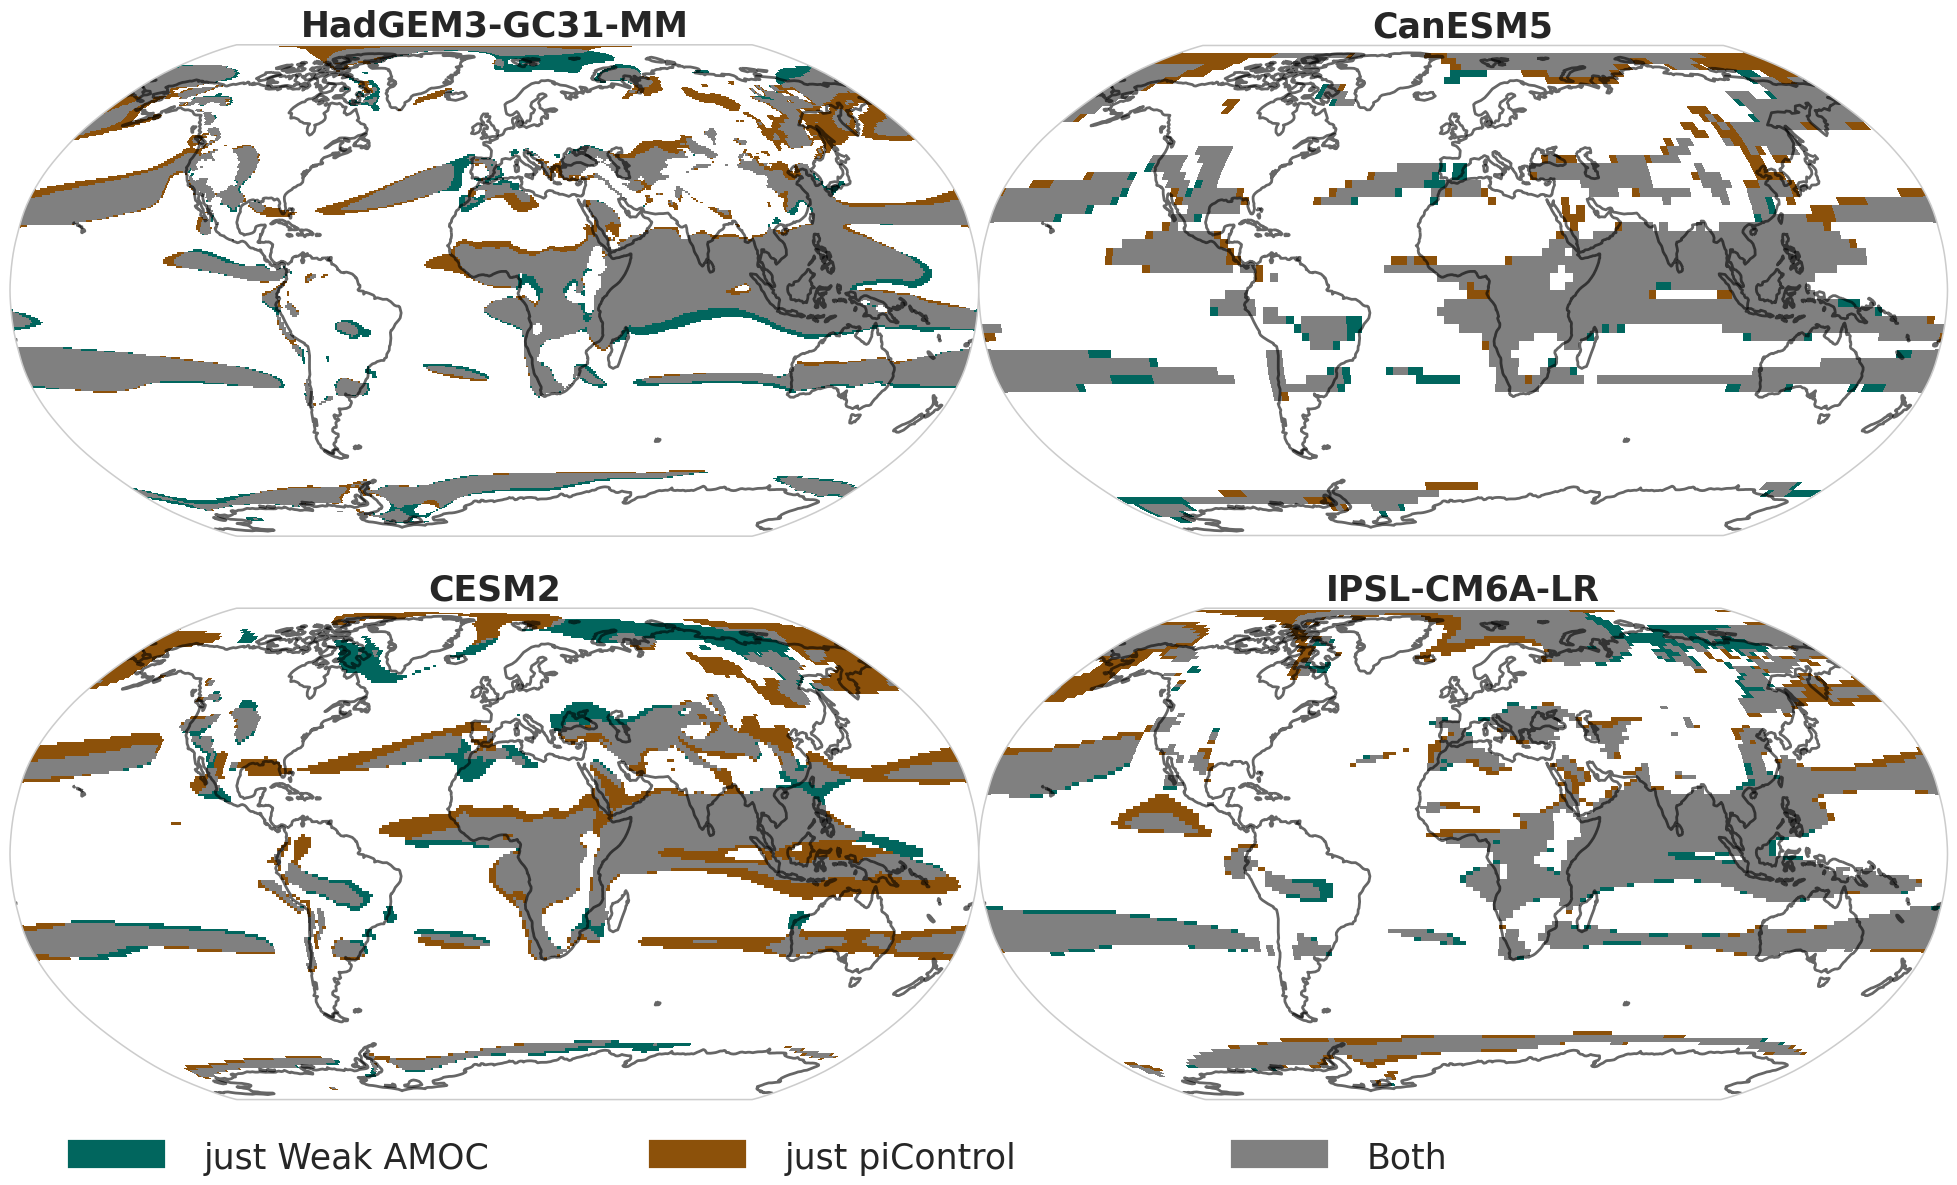

In [32]:
fig = plt.figure(figsize=(25, 15))
gs = gridspec.GridSpec(nrows=3, ncols=2,height_ratios=(1,1,0.05))
axs =  [fig.add_subplot(gs[0,0],projection=ccrs.Robinson()),
        fig.add_subplot(gs[0,1],projection=ccrs.Robinson()),
        fig.add_subplot(gs[1,0],projection=ccrs.Robinson()),
        fig.add_subplot(gs[1,1],projection=ccrs.Robinson())]
colorss = ['#01665e','#8c510a','grey']

for im, model in enumerate(model_names):
    ax = axs[im]
    
    asigma = asigmas[model]
    csigma = csigmas[model]
    
    plus = asigma.where((asigma<0) & (csigma>=0))
    minus = asigma.where((asigma>=0) & (csigma<0))
    both = asigma.where((asigma>=0) & (csigma>=0))
    datas = [plus, minus, both]
    
    for i, data in enumerate(datas):
        data.plot(
            ax = ax,
            transform=ccrs.PlateCarree(),
            colors = [colorss[i],colorss[i]],
            levels = [-100,100],
            add_colorbar = False,
            x='lon',y='lat')
    ax.coastlines(linewidth=2,alpha=0.6)
    ax.set_title(model_names_ttls[im],fontweight='bold',fontsize=25)
    
ax = fig.add_subplot(gs[2,:]) 
ax.axis('off')
ax.text(0.1,-0.15,'just Weak AMOC',transform=ax.transAxes,fontsize=25)
ax.text(0.4,-0.15,'just piControl',transform=ax.transAxes,fontsize=25)
ax.text(0.7,-0.15,'Both',transform=ax.transAxes,fontsize=25)
leg_rect2 = mpl.patches.Rectangle((0.03,-0.15), 0.05, 1, transform=ax.transAxes,fill=True,alpha=1,color='#01665e',clip_on=False)
ax.add_patch(leg_rect2)
leg_rect2 = mpl.patches.Rectangle((0.33,-0.15), 0.05, 1, transform=ax.transAxes,fill=True,alpha=1,color='#8c510a',clip_on=False)
ax.add_patch(leg_rect2)
leg_rect2 = mpl.patches.Rectangle((0.63,-0.15), 0.05, 1, transform=ax.transAxes,fill=True,alpha=1,color='grey',clip_on=False)
ax.add_patch(leg_rect2)

fig.subplots_adjust(wspace=0,hspace=0)

fig.savefig('../reps/AMOC_hosing_precip/plots/DNS_mean.pdf',bbox_inches='tight')
fig.savefig('../reps/AMOC_hosing_precip/plots/DNS_mean.png',bbox_inches='tight')    
plt.show()

## seasonal cycle

In [33]:
asigma_boxes = xr.open_dataset('../DNS/DNS_seas_aboxes.nc').sigma
csigma_boxes = xr.open_dataset('../DNS/DNS_seas_cboxes.nc').sigma
obs_sigma = xr.open_dataset('../DNS/NCEPre_sigma.nc').sigma

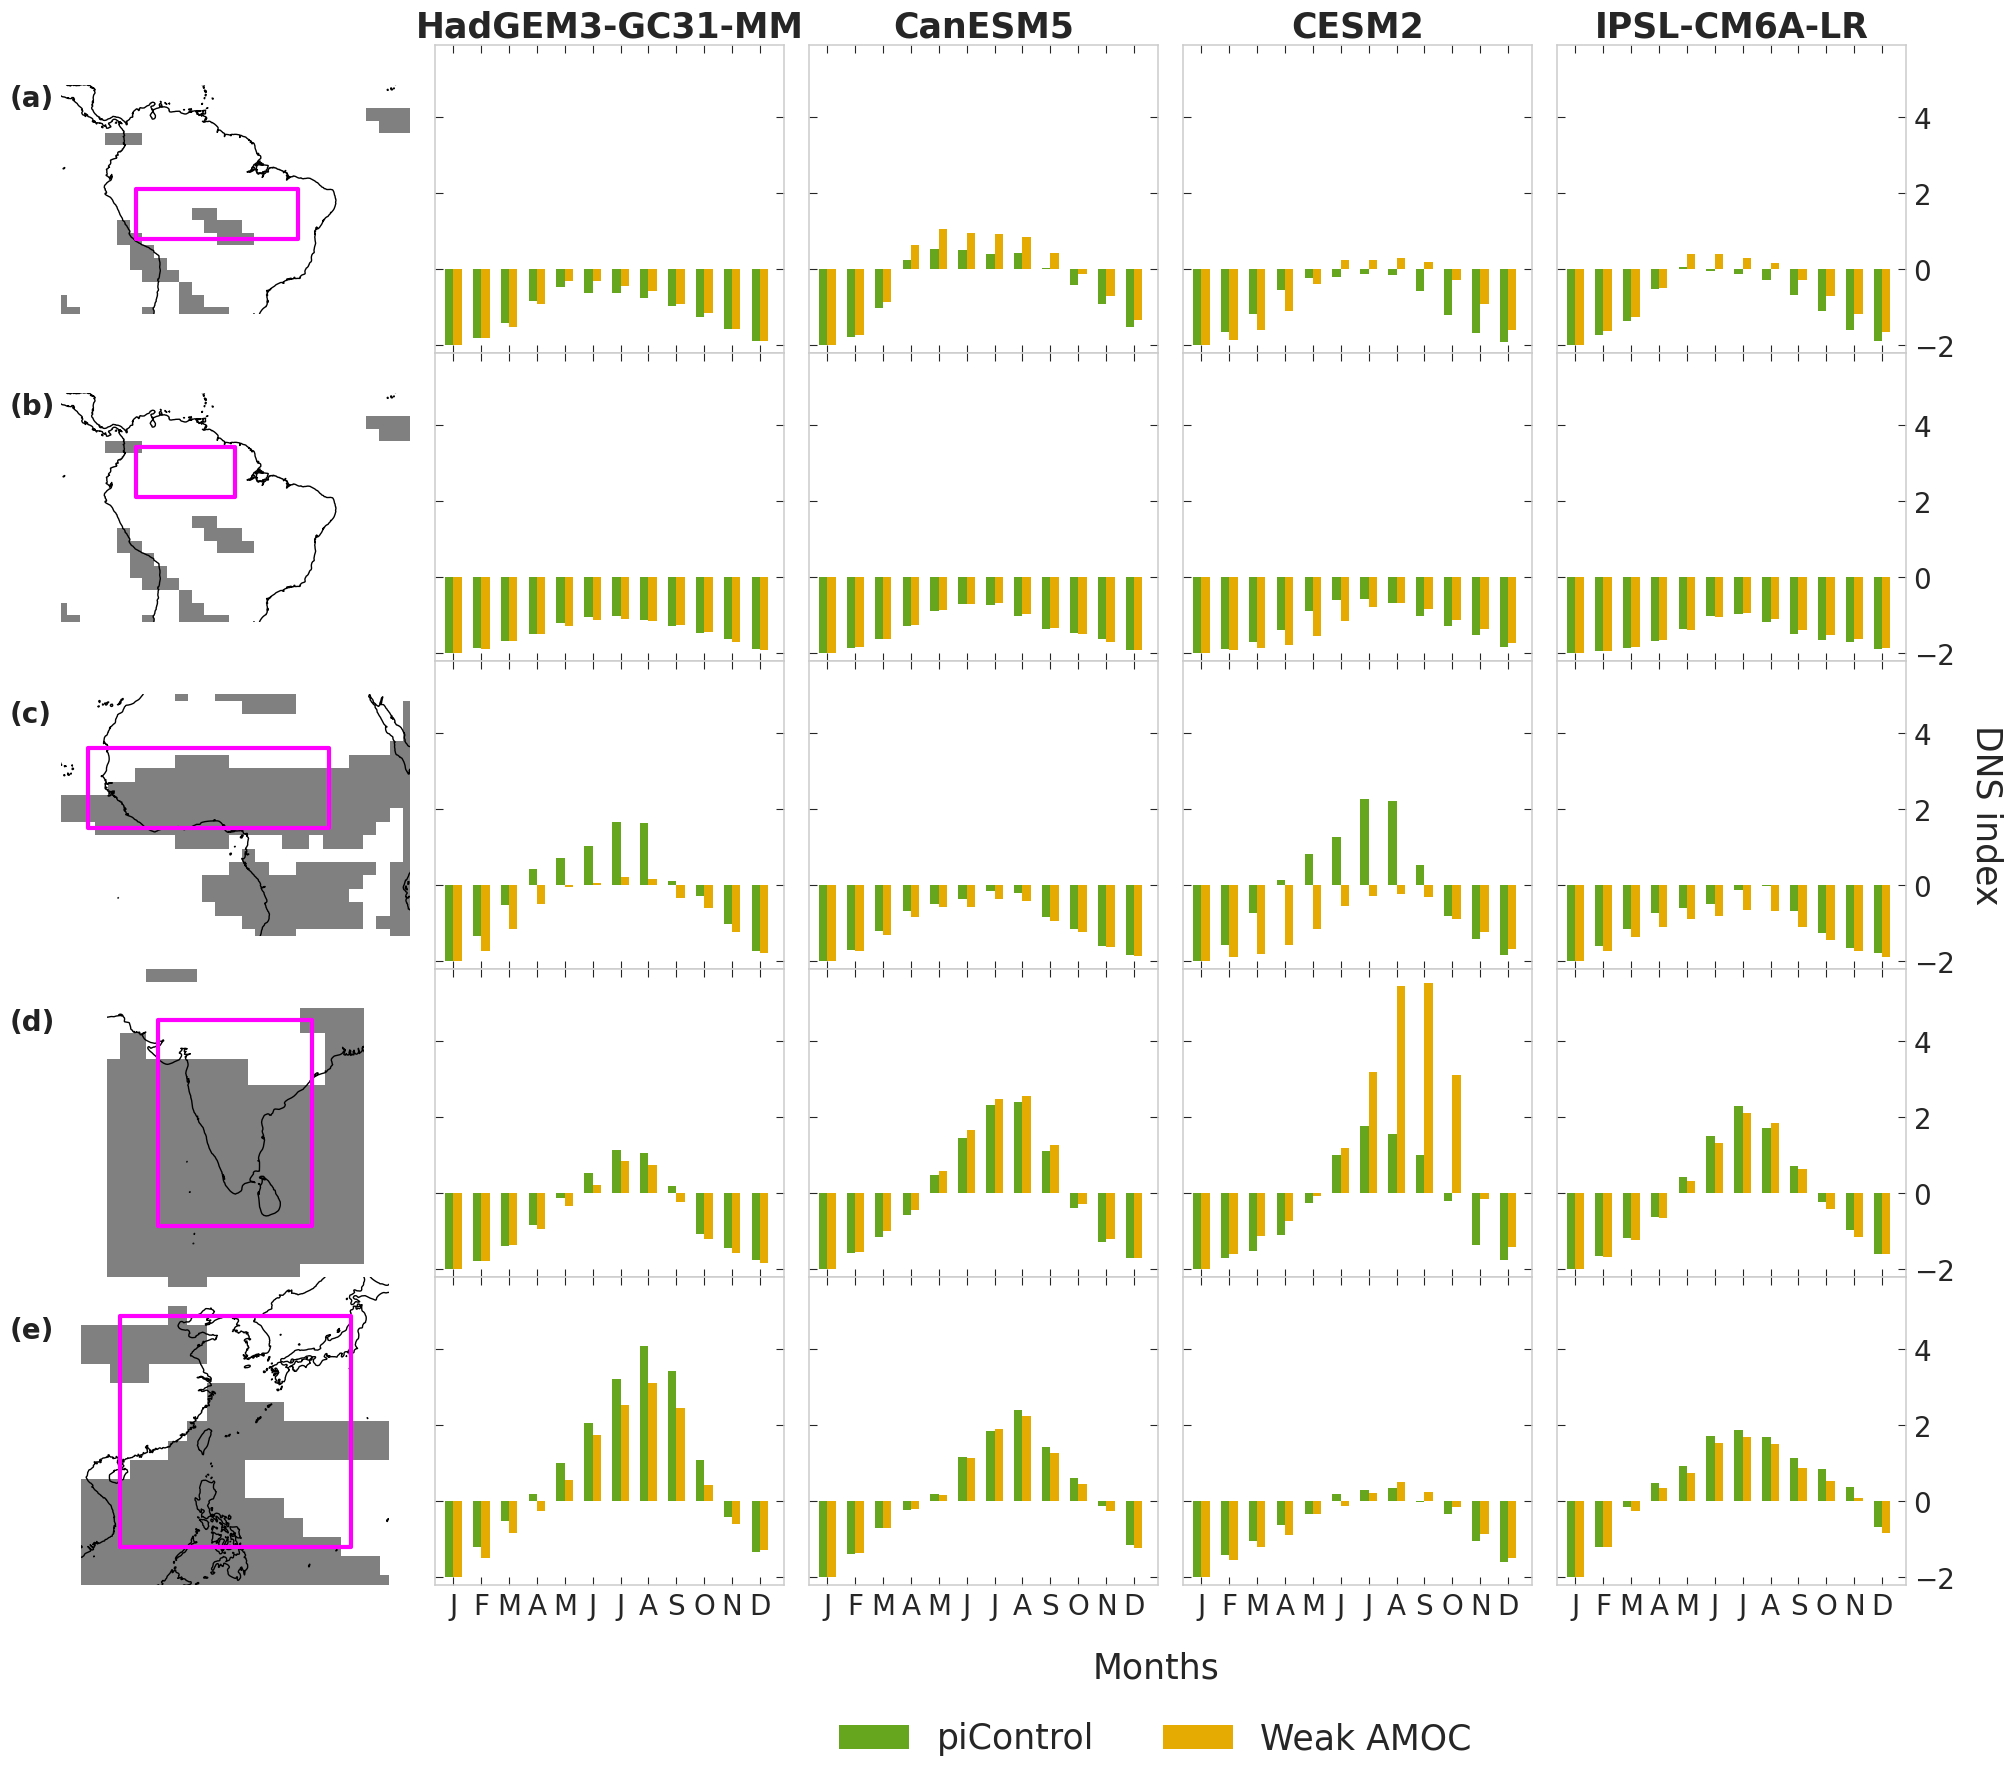

In [34]:
fig = plt.figure(figsize=(25,20))
gs = fig.add_gridspec(5, 7,width_ratios=(0.05,0.07,1,1,1,1,1))

tt = np.arange(1,13)

for i, ibox in enumerate([0,8,9,10,11]):
    box = list(boxes_dict.keys())[ibox]
    
    ax = fig.add_subplot(gs[i, 2], projection=ccrs.PlateCarree())
    latlon = boxes_dict[box]
    box_plot2(latlon,col='magenta')
    ax.set_extent(extent_boxes[box], crs=ccrs.PlateCarree())
    
    latlon = extent_boxes2[box]
    data = get_box2(obs_sigma,latlon[0],latlon[1],latlon[2],latlon[3],lon=True,drop=False)
    data.where(data>=0).plot(
        transform=ccrs.PlateCarree(),
        colors = ['grey','grey'],
        levels = [-100,100],
        add_colorbar = False,
        x='lon',y='lat')
    ax.set_title('')
#     ax.text(-0.2,0.8,labels[i],transform=ax.transAxes,color='k', fontweight='bold',fontsize=20)
    ax.axis('off')
    
    ax = fig.add_subplot(gs[i, 1])
    ax.text(-0.05,0.8,labels[i],transform=ax.transAxes,color='k', fontweight='bold',fontsize=20)
    ax.axis('off')
    
    for im, model in enumerate(model_names):
        ax2 = fig.add_subplot(gs[i, 3+im])
        
        cdata = csigma_boxes.sel(models=model).sel(boxes=box)
        adata = asigma_boxes.sel(models=model).sel(boxes=box)

        ax2.bar(tt,adata.values,color='C4',alpha=1,width=0.3,label='piControl')
        ax2.bar(tt+0.3,cdata.values,color='C5',alpha=1,width=0.3,label='Weak AMOC')

        ax2.set_ylim(-2.2,5.9)
        ax2.set_xlim(0.5,13)
    
        ax2.set_xticks(np.arange(1,13)+0.15)
        ax2.set_xticklabels([mon[0] for mon in months])
#         ax2.legend()
#         ax2.set_yticks([0,2.5,5,7.7,10,12.5])
        ax2.tick_params(axis='x', which='both',labelbottom=False, labelsize=20)
        ax2.tick_params(axis='y', which='both',labelleft=False)
    
        if im==3:
#             ax2.set_yticklabels([0,'',5,'',10,''])
            ax2.tick_params(axis='y', which='both',labelright=True,labelsize=20)
            if i==2:
                ax2.set_ylabel('DNS index',rotation=270,labelpad=35,fontsize=25)
                ax2.yaxis.set_label_position("right")
        if i==4:
            ax2.set_xlabel('')
            ax2.tick_params(axis='x', which='both',bottom=True,top=True,labelbottom=True, labelsize=20)
        else:
            ax2.set_title('')
        if i==0:
            ax2.set_title(model_names_ttls[im],fontweight='bold',fontsize=25)
fig.supxlabel('Months',fontsize=25,x=0.6,y=0.06)



ax2.legend(bbox_to_anchor=(-2.1, -0.4), loc='upper left', borderaxespad=0., fontsize=25,fancybox=False,frameon=False,ncol=4)
fig.subplots_adjust(hspace=0,wspace=0.1)
fig.patch.set_facecolor('white')
fig.savefig('../reps/AMOC_hosing_precip/plots/DNS_seasonal.pdf',bbox_inches='tight')
fig.savefig('../reps/AMOC_hosing_precip/plots/DNS_seasonal.png',bbox_inches='tight')

plt.show()
